### Part 2: Model Training

In this section, we focus on training regression models for score prediction and logistic regression models for winner prediction. A custom evaluation metric is also introduced to balance overfitting, underfitting, and model accuracy. The process involves preparing the environment by loading pre-processed data and installing the necessary libraries.

---

#### Step 1: Install Necessary Libraries (Colab Configuration)
Before beginning model training, ensure that all necessary libraries are installed. Libraries such as `numpy`, `pandas`, `scikit-learn`, `matplotlib`, and `catboost` are essential for our tasks.

---

#### Step 2: Load Processed Data
Load the pre-processed data into the environment to ensure it is ready for model training and validation.

---

#### Step 3: Regression Model - Data Exploration and Feature Importance
- Explore the data to identify key features and their importance.
- Perform correlation analysis and feature mapping to understand the relationships and the impact of each feature on model predictions.
- Split the data into training and testing sets to validate model performance.

---

#### Step 4: Define Regression Training and Evaluation Functions
Define functions for training and evaluating regression models. These functions compute critical performance metrics, including:
- **R²**: Variance explained by the model.
- **RMSE**: Average magnitude of prediction errors.
- **MBD**: Average bias between predictions and actual values.

The custom evaluation metrics is introduced:
$$
\text{Custom Metric} = \left(\frac{\text{R² (Test)}}{\text{R² Difference}}\right) \times \left(\frac{1}{\text{RMSE (Test)} \cdot \sqrt[4]{\text{RMSE Difference}}}\right) \times \left(\frac{1}{|\text{MBD (Test)}| \cdot \sqrt[4]{\text{MBD Difference}}}\right)
$$

$$
\text{Custom Metric2} = \left(\frac{\text{R² op}}  {\sqrt[4]{\text{R² Difference}}}\right) \times \left(\frac{1}{\text{RMSE op} \cdot \sqrt[4]{\text{RMSE Difference}}}\right) \times \left(\frac{1}{|\text{MBD op}| \cdot \sqrt[4]{\text{MBD Difference}}}\right)
$$
where
   $$
   R^2_{\text{op}} = \frac{2 \cdot R^2_{\text{test}} - R^2_{\text{train}}}{3}
   $$
  
   $$
   \text{RMSE}_{\text{op}} = \frac{2 \cdot \text{RMSE}_{\text{test}} + \text{RMSE}_{\text{train}}}{3}
   $$

   $$
   \text{MBD}_{\text{op}} = \frac{2 \cdot |\text{MBD}_{\text{test}}| + |\text{MBD}_{\text{train}}|}{3}
   $$

This metric balances prediction accuracy, overfitting, and underfitting, making it vital for selecting robust models.

---

#### Step 5: Regression Model Training
Train the regression model using the training dataset. Employ cross-validation techniques to ensure the model generalizes well to unseen data. After finding best params for each model, train best combination of top models based on stack.  

---

#### Step 6: Evaluate Regression Model
Evaluate the regression model using the test dataset. Metrics such as R², RMSE, and the custom metric and custom metric2 are analyzed to gauge model performance and reliability on unseen data and test data.

---

#### Step 7: Logistic Regression - Data Exploration and Feature Importance
Similar to regression, explore data for logistic regression to identify significant features. Prepare the dataset for binary classification tasks.

---

#### Step 8: Define Logistic Training and Evaluation Functions
Define functions for training and evaluating logistic regression models. These functions compute key classification metrics:
- **Accuracy**: Percentage of correct predictions.
- **Precision**: Proportion of true positives among predicted positives.
- **Recall**: Proportion of true positives among actual positives.
- **F1-Score**: Harmonic mean of precision and recall.

A custom evaluation metric is introduced for logistic regression to address overfitting, underfitting, and prediction reliability:
$$
\text{Custom Metric} = \left(\frac{\text{F1 (Test)}}{\text{F1 Difference}}\right) \times \left(\frac{\text{Accuracy (Test)}}{\text{Accuracy Difference}}\right)
$$
This metric ensures that models with high test F1 scores and minimal overfitting are prioritized.

---

#### Step 9: Logistic Regression Training
Train the logistic regression model using the training dataset. Adjust model-specific parameters (e.g., regularization) to improve performance.

---

#### Step 10: Evaluate Logistic Regression Model
Evaluate the logistic regression model on the test dataset using metrics such as accuracy, precision, recall, and F1-score. Analyze the confusion matrix for insights into model performance.

The custom metric is applied to regression and logistic models to ensure balanced evaluation, addressing overfitting and underfitting concerns effectively.


# Step 1: Install Necessary Libraries colab configuration
## Google Colab:
I utilize Google Colab for processing large datasets due to its Software as a Service (SaaS) nature provided by Google. With Google Colab, I can avoid the need for infrastructure maintenance and limits, making it a hassle-free solution for my project. Its ease of use and seamless integration with other Google services make it a convenient choice for implementing my data processing tasks. Additionally, Google Colab provides powerful computational resources, including GPU and TPU support, enabling me to efficiently handle the computational demands of big data analytics without worrying about hardware constraints.

In [1]:
# prompt: monut to google drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install xgboost

In [3]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.5 MB/s eta 0:00:00


In [4]:
# Core libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical computations and array operations
import matplotlib.pyplot as plt # For visualisations

# Scikit-learn utilities and models
from sklearn.pipeline import Pipeline, make_pipeline  # To build pipelines for data transformation and modeling
from sklearn.preprocessing import StandardScaler, PolynomialFeatures  # StandardScaler for feature scaling, PolynomialFeatures for polynomial regression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV, cross_val_predict, KFold  # For data splitting, hyperparameter tuning, and cross-validation
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, BayesianRidge, Ridge, LogisticRegression  # Linear and regularized regression models
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier  # Tree models for regression and classification
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier, StackingRegressor  # Ensemble methods
from sklearn.svm import SVR  # Support Vector Regression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier  # Nearest Neighbors for regression and classification
from sklearn.metrics import r2_score, mean_squared_error, make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,roc_auc_score # For model evaluation metrics
from sklearn.gaussian_process import GaussianProcessRegressor  # Gaussian Process Regression
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C  # Kernels for Gaussian Process Regression

# CatBoost library
from catboost import CatBoostRegressor, CatBoostClassifier  # CatBoost for regression and classification


# XGBoost library
from xgboost import XGBRegressor, XGBClassifier  # XGBoost for high-performance regression and classification

from itertools import combinations #for stack combinations

# Warnings
import warnings  # To handle warnings
warnings.filterwarnings('ignore')  # Ignore warnings for cleaner output


# step 2: Load Processed Data

In [5]:
data_win_p=pd.read_csv('/content/drive/MyDrive/cricket /data.csv')#reading data

now data is proccesd to be ready to be consumed for ml app

# Step 3: Regression Model: Data Exploration and Feature Importance

In [6]:
data = data_win_p.drop(columns=['is_winner', 'Unnamed: 0','Team'])
data #


,sum team mate,sum team opponent,number of wins,Type,Gender,month,Score,total_wins,team_experience,opponent_total_wins,opponent_experience
0,151.028046,221.846948,364,Test,male,11,605,705,582,268,477
1,116.145696,153.524269,364,Test,male,11,246,705,582,268,477
2,112.889448,152.355429,364,Test,male,11,510,705,582,268,477
3,112.889448,106.416181,364,Test,male,12,631,705,582,249,505
4,112.889448,100.614929,364,Test,male,12,624,705,582,249,505
...,...,...,...,...,...,...,...,...,...,...,...
35681,58.111437,30.926471,28,MDM,male,11,447,30,77,33,78
35682,18.329607,117.884663,83,T20,male,11,139,100,159,104,255
35683,117.964467,59.177502,440,ODI,male,11,175,462,899,396,954
35684,1.051244,11.080450,3,T20,male,11,56,13,14,16,34


The data has been mapped, with categorical variables converted into numerical values

In [9]:
type_map={type: i for i, type in enumerate(data['Type'].unique())}
gender_map={gender:i for i,gender in enumerate(data['Gender'].unique())}

data['Type']=data['Type'].map(type_map)
data['Gender']=data['Gender'].map(gender_map)
data_win_p['Type']=data_win_p['Type'].map(type_map)
data_win_p['Gender']=data_win_p['Gender'].map(gender_map)
data_win_p['is_winner']=data_win_p['is_winner'].map({'Yes': 1, 'No': 0})

data

,sum team mate,sum team opponent,number of wins,Type,Gender,month,Score,total_wins,team_experience,opponent_total_wins,opponent_experience
0,151.028046,221.846948,364,0,0,11,605,705,582,268,477
1,116.145696,153.524269,364,0,0,11,246,705,582,268,477
2,112.889448,152.355429,364,0,0,11,510,705,582,268,477
3,112.889448,106.416181,364,0,0,12,631,705,582,249,505
4,112.889448,100.614929,364,0,0,12,624,705,582,249,505
...,...,...,...,...,...,...,...,...,...,...,...
35681,58.111437,30.926471,28,3,0,11,447,30,77,33,78
35682,18.329607,117.884663,83,2,0,11,139,100,159,104,255
35683,117.964467,59.177502,440,1,0,11,175,462,899,396,954
35684,1.051244,11.080450,3,2,0,11,56,13,14,16,34


In [10]:
data.corr()

,sum team mate,sum team opponent,number of wins,Type,Gender,month,Score,total_wins,team_experience,opponent_total_wins,opponent_experience
sum team mate,1.000000,0.684891,0.302300,-0.413741,-0.292645,-0.117834,0.201012,0.540069,0.270682,0.222352,0.220012
sum team opponent,0.684891,1.000000,0.245995,-0.393195,-0.311223,-0.119739,0.194396,0.417460,0.246303,0.320865,0.295153
number of wins,0.302300,0.245995,1.000000,-0.335123,0.161918,0.001414,0.128207,0.766618,0.976674,0.819640,0.852332
Type,-0.413741,-0.393195,-0.335123,1.000000,0.000648,0.058074,-0.076651,-0.486483,-0.331916,-0.335123,-0.331916
Gender,-0.292645,-0.311223,0.161918,0.000648,1.000000,0.071117,-0.250694,0.048788,0.158217,0.161918,0.158217
month,-0.117834,-0.119739,0.001414,0.058074,0.071117,1.000000,-0.011609,-0.012576,0.006711,0.001414,0.006711
Score,0.201012,0.194396,0.128207,-0.076651,-0.250694,-0.011609,1.000000,0.235506,0.138152,0.101838,0.119325
total_wins,0.540069,0.417460,0.766618,-0.486483,0.048788,-0.012576,0.235506,1.000000,0.734807,0.613411,0.630730
team_experience,0.270682,0.246303,0.976674,-0.331916,0.158217,0.006711,0.138152,0.734807,1.000000,0.852332,0.889891
opponent_total_wins,0.222352,0.320865,0.819640,-0.335123,0.161918,0.001414,0.101838,0.613411,0.852332,1.000000,0.976674


Since the: month column has corelation less than 0.1 it is better to be dropped

In [11]:
data = data.drop(columns=['month'])


data is normized to be ready for ml app

In [12]:
X = data.drop(columns=['Score'])  # Features (all columns except 'Score')
y = data['Score']  # Target variable

x_kernel= X

scaler = StandardScaler()

z_scores = scaler.fit_transform(X)

X = pd.DataFrame(z_scores, columns=X.columns)

X

,sum team mate,sum team opponent,number of wins,Type,Gender,total_wins,team_experience,opponent_total_wins,opponent_experience
0,0.641238,1.389239,2.153023,-2.137727,-0.468189,2.443300,1.592254,1.394046,1.162349
1,0.249302,0.606103,2.153023,-2.137727,-0.468189,2.443300,1.592254,1.394046,1.162349
2,0.212715,0.592705,2.153023,-2.137727,-0.468189,2.443300,1.592254,1.394046,1.162349
3,0.212715,0.066135,2.153023,-2.137727,-0.468189,2.443300,1.592254,1.243831,1.276991
4,0.212715,-0.000361,2.153023,-2.137727,-0.468189,2.443300,1.592254,1.243831,1.276991
...,...,...,...,...,...,...,...,...,...
35681,-0.402766,-0.799152,-0.503399,0.978654,-0.468189,-0.823743,-0.475382,-0.463869,-0.471288
35682,-0.849751,0.197590,-0.068568,-0.060140,-0.468189,-0.484938,-0.139647,0.097459,0.253408
35683,0.269738,-0.475330,2.753881,-1.098933,-0.468189,1.267165,2.890156,2.406016,3.115344
35684,-1.043890,-1.026634,-0.701049,-0.060140,-0.468189,-0.906024,-0.733325,-0.598271,-0.651438


### Code Explanation

#### Data Preparation
1. **Feature and Target Separation**:
   - The `data` DataFrame is split into:
     - `X`: Features (all columns except `'Score'`).
     - `y`: Target variable (`'Score'`).

#### Train-Test Split
2. **Splitting the Data**:
   - The dataset is divided into training and testing sets using an 80-20 split:
     - `X_train`, `y_train`: 80% of the data for training.
     - `X_test`, `y_test`: 20% of the data for testing.

3. **Select Subset for Hyperparameter Tuning**:
   - From the training set (`X_train`, `y_train`), a smaller subset (5% of the original training data) is selected for hyperparameter tuning:
     - `X_select`, `y_select`: 5% of the training data for tuning.
     - `x_test_select`, `y_test_select`: Remaining 1% of the training data.
     - `x_train_select`, `y_train_select`: Remaining 4% of the training data.

#### Data Summary
4. **Shape of the Splits**:
   - The shapes of all splits are printed to confirm the sizes of the training, testing, and select datasets:
     - `X_train` and `y_train`: Main training dataset.
     - `X_test` and `y_test`: Main test dataset.
     - `X_train_select` and `y_train_select`: Subset of the training data for tuning.
     - `x_test_select` and `y_test_select`: Remaining training data for validation or other purposes.


In [13]:
# Split the data into training and testing sets
X_train_seen, X_test_unseen, y_train_seen, y_test_unseen = train_test_split(X, y, test_size=0.01, random_state=85) # 99% train for seen data, 1% test for unseen
X_train, X_test, y_train, y_test = train_test_split(X_train_seen,y_train_seen, test_size=0.2, random_state=99) # 80% train, 20% test
X_select, _ , y_select, _ = train_test_split(X_train, y_train, test_size=0.95, random_state=42) # since we have a large scale data we get 5 of training data for selcting and tuning  (4 percent of whole data)

# Select a subset for hyperparameter tuning
X_train_select, x_test_select, y_train_select, y_test_select = train_test_split(X_select, y_select, test_size=0.2, random_state=42)

# we can use X_train, X_test, y_train, and y_test for model training and evaluation
print(f"X_train_seen shape: {X_train_seen.shape}")
print(f"y_tarin_seen shape: {y_train_seen.shape}\n")
print(f"x_test_unseen shape: {X_test_unseen.shape}")
print(f"y_test_unseen shape: {y_test_unseen.shape}\n")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}\n")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}\n")
print(f"X_train_select shape: {X_train_select.shape}")
print(f"y_tarin_select shape: {y_train_select.shape}\n")
print(f"x_test_select shape: {x_test_select.shape}")
print(f"y_test_select shape: {y_test_select.shape}\n")

print(f"whole records of X ({X.shape[0]}) are X = X_test_unseen + X_train_seen = {X_test_unseen.shape[0]} + {X_train_seen.shape[0]} = {X_train_seen.shape[0] + X_test_unseen.shape[0]} = {X.shape[0]} ")
print(f"Whole records of Y ({y.shape[0]}) are Y = y_test_unseen + y_train_seen = {y_test_unseen.shape[0]} +  {y_train_seen.shape[0]} = {y_train_seen.shape[0] + y_test_unseen.shape[0]} = {y.shape[0]} \n")

print(f"whole records of X_train_seen ({X_train_seen.shape[0]}) are X_train_seen = X_train + X_test = {X_train.shape[0]} + {X_test.shape[0]} = {X_train.shape[0] + X_test.shape[0]} = {X_train_seen.shape[0]} ")
print(f"whole records of y_train_seen ({y_train_seen.shape[0]}) are y_train_seen = y_train + y_test = {y_train.shape[0]} + {y_test.shape[0]} = {y_train.shape[0] + y_test.shape[0]} = {y_train_seen.shape[0]} \n")

X_train_seen shape: (35329, 9)
y_tarin_seen shape: (35329,)

x_test_unseen shape: (357, 9)
y_test_unseen shape: (357,)

X_train shape: (28263, 9)
y_train shape: (28263,)

X_test shape: (7066, 9)
y_test shape: (7066,)

X_train_select shape: (1130, 9)
y_tarin_select shape: (1130,)

x_test_select shape: (283, 9)
y_test_select shape: (283,)

whole records of X (35686) are X = X_test_unseen + X_train_seen = 357 + 35329 = 35686 = 35686 
Whole records of Y (35686) are Y = y_test_unseen + y_train_seen = 357 +  35329 = 35686 = 35686 

whole records of X_train_seen (35329) are X_train_seen = X_train + X_test = 28263 + 7066 = 35329 = 35329 
whole records of y_train_seen (35329) are y_train_seen = y_train + y_test = 28263 + 7066 = 35329 = 35329 



In [14]:
# Split the data into training and testing sets for kernel
Xk_train_seen, Xk_test_unseen, yk_train_seen, yk_test_unseen = train_test_split(x_kernel, y, test_size=0.01, random_state=85) # 99% train for seen data, 1% test for unseen
Xk_train, Xk_test, yk_train, yk_test = train_test_split(Xk_train_seen,yk_train_seen, test_size=0.2, random_state=99) # 80% train, 20% test
Xk_select, _ , yk_select, _ = train_test_split(Xk_train, yk_train, test_size=0.95, random_state=42) # since we have a large scale data we get 5 of training data for selcting and tuning  (4 percent of whole data)

# Select a subset for hyperparameter tuning
Xk_train_select, xk_test_select, yk_train_select, yk_test_select = train_test_split(Xk_select, yk_select, test_size=0.2, random_state=42)

 # Step 4: Define Training and Evaluation Functions

### `evaluation_model` Function Explanation

The `evaluation_model` function evaluates the performance of a regression model on both training and testing datasets. It calculates key metrics to assess predictive accuracy, generalization capability, and bias in predictions.

---

### **Function Inputs**
1. **`model`**: The machine learning model to evaluate (e.g., a regression model).
2. **`x_train`, `x_test`**: Training and testing feature datasets.
3. **`y_train`, `y_test`**: Training and testing target datasets.

---

### **Function Steps**

#### 1. **Model Training**
   - The model is trained on the training data (`x_train`, `y_train`) using the `.fit()` method.

#### 2. **Predictions**
   - Predictions are generated for both the training (`x_train`) and testing (`x_test`) datasets using the `.predict()` method.

#### 3. **Evaluation Metrics**
   The function computes the following metrics for both training and testing datasets:

   - **R² Score**:
     - Measures how well the model explains the variance in the target variable.
     - Computed using `r2_score` for both datasets.

   - **RMSE (Root Mean Squared Error)**:
     - Quantifies the average magnitude of prediction errors.
     - Computed using `mean_squared_error`.

   - **MBD (Mean Bias Deviation)**:
     - Captures the average bias (difference) between predictions and actual values.
     - Indicates systematic over- or under-prediction.

   - **Differences**:
     - **R² Difference**: Absolute difference between training and testing R² scores.
     - **RMSE Difference**: Absolute difference between training and testing RMSE values.
     - **MBD Difference**: Absolute difference between training and testing MBD values.

#### 4. **Custom Metric**
   - A custom metric evaluates the model's balance between accuracy, overfitting, and underfitting. It is defined as:
   $$
   \text{Custom Metric} = \left(\frac{\text{R² (Test)}}{\text{R² Difference}}\right) \times \left(\frac{1}{\text{RMSE (Test)} \cdot \sqrt[4]{\text{RMSE Difference}}}\right) \times \left(\frac{1}{|\text{MBD (Test)}| \cdot \sqrt[4]{\text{MBD Difference}}}\right)
   $$
   - Penalizes models with large differences between training and testing performance while rewarding accurate predictions.

#### 5. **Metrics Display**
   - The computed metrics, including R², RMSE, MBD, and the custom metric, are printed for both testing and training datasets.

#### 6. **Return Best Parameters**
   - If the model is part of a grid search process, the best parameters are returned.

---

### **Function Outputs**
- **Printed Metrics**:
  - **R²**: Proportion of variance explained by the model.
  - **RMSE**: Average magnitude of prediction errors.
  - **MBD**: Average bias in predictions.
  - **Custom Metric**: Balances accuracy, overfitting, and underfitting.
- **Best Parameters** (if available): Optimal hyperparameters for the model.

---

### **Example Output**
```plaintext
Test Metrics:
R² (Test): 0.7352
RMSE (Test): 72.2998
MBD (Test): -1.1000
Custom Metric: 0.5034

Train Metrics:
R² (Train): 0.8342
RMSE (Train): 57.4626
MBD (Train): -0.0086


# Step 4: Define Training and Evaluation Functions

In [15]:
def evaluation_model(model, x_train, x_test, y_train, y_test):
    """

    Args:
      model:
      x_train:
      x_test:
      y_train:
      y_test:

    Returns:

    """
    # Fit the model on training data
    model.fit(x_train, y_train)

    # Predictions for train and test sets
    y_pre_test = model.predict(x_test)
    y_pre_train = model.predict(x_train)

    # R² Scores
    r2_test = r2_score(y_test, y_pre_test)
    r2_train = r2_score(y_train, y_pre_train)

    # RMSE (Root Mean Squared Error)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pre_test))
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pre_train))

    # MBD (Mean Bias Deviation)
    mbd_test = np.mean(y_pre_test - y_test)
    mbd_train = np.mean(y_pre_train - y_train)

    # Differences
    mbd_diff = abs(mbd_test - mbd_train)
    r2_diff = abs(r2_test - r2_train)
    rmse_diff = abs(rmse_test - rmse_train)

    # Prevent division by zero for custom metric
    if r2_diff == 0 or rmse_diff == 0 or mbd_diff == 0:
        custom_metric = 'Error'
    else:
        custom_metric = (r2_test / r2_diff) * (1 / (rmse_test * np.power(rmse_diff, 1/4))) * (1 / (abs(mbd_test) * np.power(mbd_diff, 1/4)))

    # Print Evaluation Metrics
    print("Test Metrics:")
    print(f"R² (Test): {r2_test:.4f}")
    print(f"RMSE (Test): {rmse_test:.4f}")
    print(f"MBD (Test): {mbd_test:.4f}")
    print(f"Custom Metric: {custom_metric:.4f}")

    print("\nTrain Metrics:")
    print(f"R² (Train): {r2_train:.4f}")
    print(f"RMSE (Train): {rmse_train:.4f}")
    print(f"MBD (Train): {mbd_train:.4f}")

    # Return the best parameters if available (for grid search models)
    try:
        return model.best_params_
    except AttributeError:
        return None


# Step 5: Regression Model Training

### Explanation of the Code: Decision Tree Hyperparameter Tuning with GridSearchCV

#### **Purpose**
The objective of this code is to identify the best hyperparameters for a **DecisionTreeRegressor** by testing various combinations of maximum tree depth (`max_depth`) and the minimum number of samples required to split a node (`min_samples_split`). The optimal parameters are evaluated using the `evaluation_model` function.

---

### **Steps Explained**

#### 1. **Define the Hyperparameter Grid**
- A grid of hyperparameters is created for tuning:
  - **`max_depth`**: Specifies how deep the tree can grow. Smaller depths (e.g., `3`) reduce the risk of overfitting but may lead to underfitting, while larger depths (e.g., `10`) increase the complexity of the model, potentially overfitting the data.
  - **`min_samples_split`**: Defines the minimum number of samples required to split a node. Higher values prevent overfitting by limiting the growth of the tree.

#### 2. **Set Up GridSearchCV**
- **GridSearchCV** systematically tests all combinations of the hyperparameter grid:
  - The **DecisionTreeRegressor** model is used as the base estimator.
  - A 3-fold cross-validation strategy (`cv=3`) evaluates each parameter combination on multiple data splits.
  - Parallel processing (`n_jobs=-1`) is used to speed up the search process by utilizing all available CPU cores.

#### 3. **Evaluate Model Performance**
- The `evaluation_model` function:
  - Trains the model with the specified hyperparameter combinations.
  - Computes evaluation metrics (R², RMSE, MBD) for both training and testing datasets.
  - Calculates a **custom metric** to balance prediction accuracy, overfitting, and underfitting risks.

#### 4. **Output the Best Parameters**
- After completing the grid search, the best combination of `max_depth` and `min_samples_split` is selected based on performance metrics.
- The selected parameters are displayed along with the evaluation metrics for the DecisionTreeRegressor.

---

### **Purpose of the Custom Metric**
- The custom metric is designed to:
  - Penalize models with large discrepancies between training and testing metrics (indicating overfitting or underfitting).
  - Reward models with balanced performance and high predictive accuracy.
  - Incorporate RMSE and MBD differences to capture both variance and bias.


In [ ]:
# Define hyperparameter grid
tree_params = {
    'max_depth': [1, 3, 5, 7, 10, 13, None],  # Depth of the tree
    'min_samples_split': [2, 5, 7, 10, 13]    # Minimum samples to split
}

# Perform GridSearchCV for DecisionTreeRegressor on the smaller tuning set
tree_tune = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid=tree_params,
    cv=3,
    n_jobs=-1
)



# Save the best parameters to `best_params_three`
best_params_three =  evaluation_model(tree_tune, X_train_select, x_test_select, y_train_select, y_test_select) # Evaluate the final model
print(f"Best Parameters for DecisionTreeRegressor: {best_params_three}")



Test Metrics:
R² (Test): 0.7678
RMSE (Test): 72.8262
MBD (Test): 2.1821
Custom Metric: 0.0571

Train Metrics:
R² (Train): 0.7167
RMSE (Train): 76.2822
MBD (Train): -0.0000
Best Parameters for DecisionTreeRegressor: {'max_depth': 3, 'min_samples_split': 13}


### Explanation of RandomForestRegressor Hyperparameter Tuning with GridSearchCV

#### **Purpose**
The objective of this process is to find the optimal hyperparameters for a **RandomForestRegressor** model by systematically exploring a grid of possible configurations. The final model is evaluated using the `evaluation_model` function, which calculates key metrics like R², RMSE, MBD, and a custom metric.

---

### **Steps Explained**

#### 1. **Define the Hyperparameter Grid**
- The following hyperparameters are tuned:
  - **`n_estimators`**: The number of decision trees in the random forest. More trees generally improve performance but increase computational cost.
  - **`max_depth`**: The maximum depth of each tree. A smaller depth reduces the risk of overfitting, while a larger depth allows the model to capture more complexity in the data.
  - **`min_samples_split`**: The minimum number of samples required to split a node. Larger values prevent the tree from growing too complex.

#### 2. **Set Up GridSearchCV**
- **GridSearchCV** tests all combinations of hyperparameters in the specified grid:
  - The **RandomForestRegressor** model is used as the estimator.
  - A 3-fold cross-validation strategy (`cv=3`) ensures the model is evaluated on different data splits to assess its generalizability.
  - Parallel processing (`n_jobs=-1`) speeds up the grid search by utilizing all available CPU cores.

#### 3. **Evaluate Model Performance**
- The `evaluation_model` function:
  - Trains the model with each parameter combination on the training data.
  - Computes evaluation metrics for both training and testing datasets:
    - **R² (Coefficient of Determination)**: Measures how well the predictions fit the actual data.
    - **RMSE (Root Mean Squared Error)**: Quantifies the average prediction error.
    - **MBD (Mean Bias Deviation)**: Indicates systematic bias in predictions.
    - **Custom Metric**: Balances overfitting, underfitting, and prediction accuracy.
  - The model with the best combination of parameters is selected.

#### 4. **Output the Best Parameters**
- The best hyperparameter combination is saved and displayed:
  - `max_depth`: Optimal depth for each decision tree.
  - `min_samples_split`: Ideal minimum number of samples for splitting a node.
  - `n_estimators`: Best number of trees in the forest.




In [ ]:
# Define hyperparameter grid with an additional parameter
rf_params = {
    'n_estimators': [10,50, 100,200],         # Number of trees in the forest
    'max_depth': [None, 10,50],           # Maximum depth of the tree
    'min_samples_split': [2, 5, 10]    # Minimum samples required to split an internal node
}

# Perform GridSearchCV for RandomForestRegressor on the tuning set
rf_tune = GridSearchCV(
    RandomForestRegressor(n_jobs=-1, random_state=42),  # Enable parallel processing
    param_grid=rf_params,
    cv=3,
    scoring = 'r2'
)



# Save the best parameters to `best_params_rf`
best_params_rf = evaluation_model(rf_tune, X_train_select, x_test_select, y_train_select, y_test_select)
print(f"Best Parameters for RandomForestRegressor: {best_params_rf}")

# Evaluate the model using the tuning subset



Test Metrics:
R² (Test): 0.7733
RMSE (Test): 71.9485
MBD (Test): 1.7146
Custom Metric: 0.0232

Train Metrics:
R² (Train): 0.8794
RMSE (Train): 49.7679
MBD (Train): -0.1684
Best Parameters for RandomForestRegressor: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}


### Explanation of GradientBoostingRegressor Hyperparameter Tuning with GridSearchCV

#### **Purpose**
The goal of this process is to optimize the hyperparameters for a **GradientBoostingRegressor** model to achieve the best predictive performance. The `evaluation_model` function is used to compute performance metrics, balancing overfitting and underfitting, and selecting the best configuration.

---

### **Steps Explained**

#### 1. **Define the Hyperparameter Grid**
- **`n_estimators`**: Number of boosting stages. Controls the complexity of the model by increasing the number of weak learners.
- **`learning_rate`**: Shrinks the contribution of each weak learner. Lower values improve generalization but require more boosting stages.
- **`max_depth`**: Maximum depth of individual decision trees. Controls the ability of the model to capture relationships in the data.

#### 2. **Set Up GridSearchCV**
- **GridSearchCV** is used to test all combinations of hyperparameters:
  - The estimator is **GradientBoostingRegressor**, a powerful ensemble method.
  - **2-fold cross-validation** (`cv=2`) ensures the model's generalization is evaluated.
  - Parallel processing (`n_jobs=-1`) speeds up computations.

#### 3. **Evaluate Model Performance**
- The `evaluation_model` function:
  - Fits the model on the training data for each parameter combination.
  - Evaluates the model's performance using key metrics:
    - **R² (Coefficient of Determination)**: Measures the proportion of variance explained by the model.
    - **RMSE (Root Mean Squared Error)**: Indicates the average magnitude of prediction errors.
    - **MBD (Mean Bias Deviation)**: Identifies systematic over- or under-predictions.
    - **Custom Metric**: A composite measure balancing overfitting, underfitting, and prediction accuracy.
  - Returns the best parameter combination.

#### 4. **Output the Best Parameters**
- The best combination of hyperparameters is determined based on the evaluation metrics:
  - `learning_rate`: Optimal step size for boosting.
  - `max_depth`: Maximum depth for individual decision trees.
  - `n_estimators`: Ideal number of boosting stages.


In [ ]:
# Define hyperparameter grid
gbr_params = {
    'n_estimators': [10, 50,100,200],          # Number of boosting stages
    'learning_rate': [0.01, 0.1, 1],  # Learning rate
    'max_depth': [None, 10]           # Maximum depth of individual estimators
}

# Perform GridSearchCV for GradientBoostingRegressor on the tuning set
gbr_tune = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid=gbr_params,
    cv=2,  # 2-fold cross-validation
    n_jobs=-1,  # Parallel processing
    scoring = 'r2'
)


# Save the best parameters dynamically as `best_params_gbr`
best_params_gbr = evaluation_model(gbr_tune, X_train_select, x_test_select, y_train_select, y_test_select)
print(f"Best Parameters for GradientBoostingRegressor: {best_params_gbr}")


Test Metrics:
R² (Test): 0.7147
RMSE (Test): 80.7215
MBD (Test): 2.4164
Custom Metric: 0.0045

Train Metrics:
R² (Train): 0.9582
RMSE (Train): 29.3045
MBD (Train): -0.0000
Best Parameters for GradientBoostingRegressor: {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 200}


### Explanation of SVR Hyperparameter Tuning with GridSearchCV

#### **Purpose**
The goal of this process is to optimize the hyperparameters of the **Support Vector Regressor (SVR)** to achieve optimal performance on both training and testing datasets. The `evaluation_model` function calculates performance metrics to assess model accuracy and generalization.

---

### **Steps Explained**

#### 1. **Define the Hyperparameter Grid**
- **`C`**: Regularization parameter. Controls the trade-off between achieving a low error on training data and minimizing model complexity to improve generalization.
- **`epsilon`**: Defines the epsilon-tube within which no penalty is given for predictions. Affects model sensitivity to small variations in the target variable.
- **`gamma`**: Kernel coefficient. Determines how far-reaching the influence of a single training example is.
- **`kernel`**: Specifies the kernel type used in the algorithm. Options:
  - `linear`: A linear kernel.
  - `rbf`: A radial basis function kernel.

#### 2. **Set Up GridSearchCV**
- **GridSearchCV** systematically tests combinations of hyperparameters:
  - The estimator is **SVR (Support Vector Regressor)**.
  - **2-fold cross-validation** (`cv=2`) ensures model evaluation on unseen data.
  - Parallel processing (`n_jobs=-1`) speeds up computations.

#### 3. **Evaluate Model Performance**
- The `evaluation_model` function:
  - Fits the model to the training dataset for each parameter combination.
  - Evaluates performance using the following metrics:
    - **R² (Coefficient of Determination)**: Indicates how well the model explains the variance in the data.
    - **RMSE (Root Mean Squared Error)**: Measures the average magnitude of prediction errors.
    - **MBD (Mean Bias Deviation)**: Highlights systematic over- or under-predictions.
    - **Custom Metric**: Evaluates the balance between overfitting, underfitting, and predictive accuracy.
  - Returns the best parameter combination based on these metrics.

#### 4. **Output the Best Parameters**
- The hyperparameter combination that produces the best results is selected:
  - `C`: Controls model regularization.
  - `epsilon`: Adjusts the model's tolerance for error.
  - `gamma`: Sets the kernel's influence range.
  - `kernel`: Defines the type of decision boundary.

In [ ]:
# Define the parameter grid
SVR_params = {
    'C': [0.5, 10],              # Regularization parameter
    'epsilon': [0.1, 1],         # Epsilon-tube within which no penalty is associated
    'gamma': ['scale'],          # Kernel coefficient
    'kernel': ['linear', 'rbf']  # Kernel types
}

# Step 1: Perform GridSearchCV for tuning on the subset
svr_tune = GridSearchCV(
    SVR(),
    param_grid=SVR_params,
    cv=2,  # 2-fold cross-validation
    n_jobs=-1  # Parallel processing
)



# Extract the best parameters from GridSearchCV
best_params_svr = evaluation_model(gbr_tune, X_train_select, x_test_select, y_train_select, y_test_select)
print(f"Best Parameters for SVR: {best_params_svr}")



Test Metrics:
R² (Test): 0.7077
RMSE (Test): 81.7081
MBD (Test): 3.2296
Custom Metric: 0.0024

Train Metrics:
R² (Train): 0.9951
RMSE (Train): 10.0449
MBD (Train): 0.0000
Best Parameters for SVR: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 50}


### Explanation of XGBRegressor Hyperparameter Tuning with GridSearchCV

#### **Purpose**
The objective is to optimize the hyperparameters of **XGBRegressor** to improve its performance for regression tasks. Using the `evaluation_model` function, the performance of the model is evaluated based on multiple metrics, including a custom metric designed to balance overfitting and underfitting.

---

### **Steps Explained**

#### 1. **Define the Hyperparameter Grid**
The hyperparameter grid specifies the values to test during the tuning process:
- **`n_estimator`**: Number of boosting rounds (trees).
- **`max_depth`**: Maximum depth of each tree, controlling model complexity.
- **`learning_rate`**: Step size shrinkage to prevent overfitting.
- **`subsample`**: Fraction of samples used for training each tree, controlling randomness and reducing overfitting.

#### 2. **Set Up GridSearchCV**
- **GridSearchCV** is used to systematically test different combinations of hyperparameters:
  - The estimator is **XGBRegressor**.
  - **2-fold cross-validation** ensures validation on unseen data for better generalization.
  - Parallel processing (`n_jobs=-1`) is enabled to speed up computations.

#### 3. **Model Evaluation with `evaluation_model`**
The `evaluation_model` function:
- Trains the model using each hyperparameter combination.
- Evaluates performance on training and testing datasets with the following metrics:
  - **R² (Coefficient of Determination)**: Measures the proportion of variance explained by the model.
  - **RMSE (Root Mean Squared Error)**: Quantifies the average magnitude of prediction errors.
  - **MBD (Mean Bias Deviation)**: Highlights systematic over- or under-predictions.
  - **Custom Metric**: Penalizes models with large differences between training and testing performance while rewarding accuracy.

#### 4. **Select Best Parameters**
The best combination of hyperparameters is selected based on the results of the custom metric and overall model performance:
- **`learning_rate`**: Step size for boosting iterations.
- **`max_depth`**: Tree depth for controlling overfitting.
- **`n_estimator`**: Number of boosting rounds.
- **`subsample`**: Fraction of samples used for tree training.


In [ ]:
xgb_params={'n_estimator':[50,100],'max_depth':[5,10],'learning_rate':[0.01,0.5],'subsample':[0.5,1]}
xgb_tune=GridSearchCV(XGBRegressor(),param_grid=xgb_params,cv=2)

best_params=evaluation_model(xgb_tune, X_train_select, x_test_select, y_train_select, y_test_select)
print(f"Best Parameters for XGBRegressor: {best_params}")


Test Metrics:
R² (Test): 0.7280
RMSE (Test): 78.8100
MBD (Test): 4.0198
Custom Metric: 0.0021

Train Metrics:
R² (Train): 0.9959
RMSE (Train): 9.1409
MBD (Train): -0.0093
Best Parameters for XGBRegressor: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimator': 50, 'subsample': 1}


### BayesianRidge Hyperparameter Tuning with RandomizedSearchCV

#### **Purpose**
The goal is to optimize the hyperparameters of the **BayesianRidge** regression model. This model assumes a probabilistic approach and incorporates prior distributions over the model parameters, making it effective in handling multicollinearity and small datasets.

---

### **Steps Explained**

#### 1. **Define the Hyperparameter Grid**
The hyperparameters for BayesianRidge are as follows:
- **`alpha_1`** and **`alpha_2`**:
  - Hyperpriors on the precision of the weights.
  - Control the strength of the prior over the model parameters.
- **`lambda_1`** and **`lambda_2`**:
  - Hyperpriors on the precision of the noise.
  - Influence the distribution of noise in the model.

#### 2. **Use RandomizedSearchCV**
- **Why RandomizedSearchCV?**
  - Instead of testing all combinations, a random subset of parameter combinations is evaluated for faster results.
- Key configurations:
  - **`n_iter`**: Number of random parameter combinations to evaluate (set to 4).
  - **`cv`**: Number of cross-validation folds (set to 2 to reduce computation time).
  - **`n_jobs`**: Parallel processing to speed up the search.
  - **`random_state`**: Ensures reproducibility.

#### 3. **Evaluate the Model**
The **`evaluation_model`** function:
- Trains the model using each parameter combination.
- Computes the following metrics:
  - **R² (Coefficient of Determination)**: Measures how well the predictions fit the actual data.
  - **RMSE (Root Mean Squared Error)**: Quantifies the average prediction error.
  - **MBD (Mean Bias Deviation)**: Indicates systematic over- or under-prediction.
  - **Custom Metric**: Balances accuracy and generalization while penalizing overfitting and underfitting.

#### 4. **Extract Best Parameters**
The best combination of hyperparameters is determined based on performance metrics, with the following optimal values:
- **`alpha_1`**: 1e-6
- **`alpha_2`**: 1e-6
- **`lambda_1`**: 1e-6
- **`lambda_2`**: 1e-5

In [ ]:
# Define hyperparameter grid for Bayesian Ridge
bayesian_params = {
    'alpha_1': [1e-6, 1e-5],  # Hyperprior on alpha
    'alpha_2': [1e-6, 1e-5],  # Hyperprior on alpha
    'lambda_1': [1e-6, 1e-5], # Hyperprior on lambda
    'lambda_2': [1e-6, 1e-5]  # Hyperprior on lambda
}

# RandomizedSearchCV for faster parameter tuning
bayesian_model_tune = RandomizedSearchCV(
    BayesianRidge(),
    param_distributions=bayesian_params,
    n_iter=4,  # Randomly test 4 parameter combinations
    cv=2,  # Reduced cross-validation folds
    n_jobs=-1,  # Parallel processing
    random_state=42  # For reproducibility
)


# Extract and print the best parameters
best_params_bayesian = evaluation_model(bayesian_model_tune, X_train_select, x_test_select, y_train_select, y_test_select)
print(f"Best Parameters for BayesianRidge: {best_params_bayesian}")




Test Metrics:
R² (Test): 0.1388
RMSE (Test): 140.2418
MBD (Test): -5.9520
Custom Metric: 0.0029

Train Metrics:
R² (Train): 0.1601
RMSE (Train): 131.3404
MBD (Train): 0.0000
Best Parameters for BayesianRidge: {'lambda_2': 1e-05, 'lambda_1': 1e-06, 'alpha_2': 1e-06, 'alpha_1': 1e-06}


### Polynomial Regression with Pipeline and GridSearchCV

#### **Purpose**
This script evaluates polynomial regression models of varying degrees to identify the optimal degree for minimizing prediction errors. It uses a pipeline to streamline preprocessing and model fitting, combined with GridSearchCV for hyperparameter tuning.

---

### **Steps Explained**

#### 1. **Pipeline Definition**
A pipeline is constructed with two steps:
- **`PolynomialFeatures`**: Expands the feature set by including polynomial terms of the original features.
- **`LinearRegression`**: Fits a linear regression model to the expanded feature set.

#### 2. **Parameter Grid**
The **`param_grid`** defines the range of polynomial degrees to evaluate:
- **`poly__degree`**: Specifies the degrees (3, 5, and 8) to include in the GridSearchCV.

#### 3. **GridSearchCV**
- **Purpose**: Automatically evaluates polynomial models with different degrees and selects the degree that minimizes the mean squared error (MSE).
- **Key Configurations**:
  - **`scoring`**: Uses MSE (negative because GridSearchCV maximizes scores).
  - **`cv`**: Employs 3-fold cross-validation to ensure robust model evaluation.
  - **`n_jobs`**: Utilizes all available CPU cores for parallel processing.

#### 4. **Fit the GridSearchCV**
The grid search is performed on the training dataset (`X_train_select` and `y_train_select`). The pipeline ensures that polynomial feature generation and model fitting occur seamlessly.


In [ ]:
# Define a pipeline with PolynomialFeatures and LinearRegression
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),  # Step to generate polynomial features
    ('linear', LinearRegression())   # Step to fit linear regression
])

# Define parameter grid for GridSearchCV
param_grid = {
    'poly__degree': [3, 5, 8]  # Degrees to tune
}

# Use GridSearchCV for tuning
grid = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    scoring=make_scorer(mean_squared_error, greater_is_better=False),  # Minimize MSE
    cv=3,  # 3-fold cross-validation
    n_jobs=-1  # Use all CPU cores
)

# Fit GridSearchCV on the select training data
grid.fit(X_train_select, y_train_select)

# Print best degree and best score
print(f"Best Polynomial Degree: {grid.best_params_['poly__degree']}")
print(f"Best CV MSE: {-grid.best_score_:.4f}")  # Negate to show positive MSE

# Evaluate the best model on select test data
best_model = grid.best_estimator_
y_test_pred = best_model.predict(x_test_select)
test_mse = mean_squared_error(y_test_select, y_test_pred)
print(f"Select Data Test MSE: {test_mse:.4f}")




Best Polynomial Degree: 3
Best CV MSE: 52253.4409
Select Data Test MSE: 15033.5402


### K-Nearest Neighbors Regression with Hyperparameter Tuning

#### **Purpose**
This script evaluates and tunes the hyperparameters of the K-Nearest Neighbors (KNN) regressor. The goal is to find the optimal combination of the number of neighbors and weighting strategy to minimize prediction errors and maximize model performance.

---

### **Steps Explained**

#### 1. **Parameter Grid**
The **`knn_params`** grid defines the hyperparameters to evaluate:
- **`n_neighbors`**: Specifies the number of neighbors to consider for predictions (values: 3, 5, and 10).
- **`weights`**: Defines the weighting strategy for predictions:
  - **`uniform`**: All neighbors have equal weight.
  - **`distance`**: Closer neighbors are assigned higher weights.

#### 2. **GridSearchCV for Hyperparameter Tuning**
- **Purpose**: Automates the evaluation of all combinations of `n_neighbors` and `weights` in the parameter grid.
- **Key Configurations**:
  - **`cv`**: Uses 3-fold cross-validation for robust evaluation.
  - **`n_jobs`**: Utilizes all available CPU cores for parallel processing.

#### 3. **Fit GridSearchCV**
The grid search is performed on the training dataset (`X_train_select` and `y_train_select`) to identify the best parameter combination that minimizes prediction errors.

#### 4. **Extract Best Parameters**
- The best hyperparameters are extracted from the grid search results:
  - **`best_params_knn`**: Contains the optimal combination of `n_neighbors` and `weights`.


In [ ]:
knn_params = {
    'n_neighbors': [3, 5, 10],  # Number of neighbors
    'weights': ['uniform', 'distance']  # Weighting strategy
}

# Step 1: Perform hyperparameter tuning on the select data
knn_tune = GridSearchCV(
    KNeighborsRegressor(),
    param_grid=knn_params,
    cv=3,  # Cross-validation folds
    n_jobs=-1  # Enable parallel processing
)


# Step 2: Extract the best parameters
best_params_knn = evaluation_model(knn_tune, X_train_select, x_test_select, y_train_select, y_test_select)
print(f"Best Parameters: {best_params_knn}")


Test Metrics:
R² (Test): 0.6031
RMSE (Test): 95.2031
MBD (Test): -6.3691
Custom Metric: 0.0005

Train Metrics:
R² (Train): 1.0000
RMSE (Train): 0.0000
MBD (Train): 0.0000
Best Parameters: {'n_neighbors': 10, 'weights': 'distance'}


### CatBoost Regression with Hyperparameter Tuning

#### **Purpose**
This script evaluates and tunes the hyperparameters of the CatBoost Regressor using GridSearchCV. The objective is to identify the best combination of parameters that maximize predictive performance on the target regression task.

---

### **Steps Explained**

#### 1. **Parameter Grid**
The **`catboost_params`** defines a comprehensive range of hyperparameters:
- **`iterations`**: Number of boosting iterations to perform.
- **`depth`**: Maximum depth of the decision trees.
- **`learning_rate`**: Step size for the gradient boosting process.
- **`l2_leaf_reg`**: L2 regularization term to reduce overfitting.
- **`min_data_in_leaf`**: Minimum number of data samples required in a leaf.
- **`bagging_temperature`**: Controls the Bayesian sampling process for bagging.

#### 2. **GridSearchCV for Hyperparameter Tuning**
- **Purpose**: Systematically evaluates all parameter combinations in the grid to identify the optimal set.
- **Key Configurations**:
  - **`cv`**: Uses 3-fold cross-validation for reliable performance estimation.
  - **`scoring`**: Optimizes the model based on the R² score.
  - **`n_jobs`**: Utilizes all CPU cores for faster computations.
  - **`silent=True`**: Suppresses verbose logs from CatBoost.

#### 3. **Fit the Model**
The grid search is performed on the training dataset (`X_train_select` and `y_train_select`), testing various parameter combinations to minimize prediction errors.

#### 4. **Extract Best Parameters**
- **`best_params_catboost`**: Captures the optimal parameter set identified by GridSearchCV.

In [ ]:

# Define hyperparameter grid
catboost_params = {
    'iterations': [ 100, 200,300],  # Number of boosting iterations
    'depth': [1, 4, 8],         # Depth of trees
    'learning_rate': [0.05, 0.1, 1],  # Step size for boosting
    'l2_leaf_reg': [3, 7,10],  # L2 regularization
    'min_data_in_leaf': [1, 10, 50],  # Minimum number of data points in a leaf
    'bagging_temperature': [0.1, 0.5, 1]  # Temperature for Bayesian sampling in bagging
}


# Initialize GridSearchCV with CatBoostRegressor
catboost_tune = GridSearchCV(
    CatBoostRegressor(silent=True, random_state=42),  # Silent mode to avoid verbose logging
    param_grid=catboost_params,
    cv=3,  # Reduced cross-validation folds for efficiency
    n_jobs=-1,  # Enable parallel processing
    scoring='r2'
)


# Get the best parameters from tuning
best_params_catboost = evaluation_model(catboost_tune, X_train_select, x_test_select, y_train_select, y_test_select)
print(f"Best Parameters: {best_params_catboost}")



Test Metrics:
R² (Test): 0.7841
RMSE (Test): 70.2211
MBD (Test): 2.1823
Custom Metric: 0.3468

Train Metrics:
R² (Train): 0.7743
RMSE (Train): 68.0910
MBD (Train): -0.2155
Best Parameters: {'bagging_temperature': 0.1, 'depth': 4, 'iterations': 100, 'l2_leaf_reg': 10, 'learning_rate': 0.1, 'min_data_in_leaf': 1}


### Gaussian Process Regressor with Custom Kernel

This document outlines the process of configuring, training, and evaluating a **Gaussian Process Regressor (GPR)** using a custom kernel. The aim is to utilize Gaussian processes for regression tasks and assess the model's performance on a subset of the dataset.

---

#### **1. Defining the Kernel**
- A kernel function specifies the covariance structure between data points in Gaussian Processes:
  - **`ConstantKernel (C)`**:
    - Represents a constant component of the kernel, scaled by a hyperparameter.
    - Allows the model to adjust the overall magnitude of predictions.
    - The range for the constant is set between `1e-3` and `1e3` to provide flexibility.
  - **`Radial Basis Function (RBF)`**:
    - Captures smooth, non-linear relationships in the data.
    - Includes a length scale parameter to control the influence of individual data points.
    - The range for the length scale is also set between `1e-3` and `1e3`.

---

#### **2. Initializing the Gaussian Process Regressor**
- The **GaussianProcessRegressor** is configured with the custom kernel:
  - The kernel combines the constant and RBF components to model both global trends and local variations.
  - **`n_restarts_optimizer=10`**:
    - Refines the hyperparameters of the kernel by restarting the optimization process 10 times, improving model accuracy.
  - **`random_state=42`**:
    - Ensures reproducibility by fixing the random seed for stochastic processes.

---

#### **3. Training the Model**
- The GPR model is trained on a smaller subset of the training dataset:
  - The subset (`X_train_select`, `y_train_select`) ensures computational efficiency while maintaining data representativeness.
  - During training, the model learns the covariance structure of the data, enabling probabilistic predictions.

---

#### **4. Model Evaluation**
- The trained GPR model is evaluated on the subset of test data:
  - Predictions are generated using the learned kernel and parameters.
  - Evaluation metrics include:
    - **R² (Coefficient of Determination)**:
      - Measures the proportion of variance in the target variable explained by the model.
    - **RMSE (Root Mean Squared Error)**:
      - Represents the average magnitude of prediction errors.
    - **MAPE (Mean Absolute Percentage Error)**:
      - Indicates the percentage error in predictions relative to actual values.
    - **MBD (Mean Bias Deviation)**:
      - Captures the average bias in predictions, revealing tendencies to over- or underpredict.

---

#### **5. Insights from Evaluation**
- **Training Metrics**:
  - High R² with low RMSE and MAPE indicates that the model effectively captures patterns in the training data.
  - MBD close to zero reflects minimal prediction bias on the training set.
- **Test Metrics**:
  - Metrics comparable to the training subset suggest that the model generalizes well to unseen data.
  - Significant differences between training and test metrics may indicate overfitting or underfitting.

---

#### **6. Expected Outcomes**
- **Custom Kernel**:
  - Combines global trends (via `ConstantKernel`) with smooth, localized relationships (via `RBF`) to effectively model the data.
- **Performance Metrics**:
  - Comprehensive evaluation of the model’s predictive accuracy and generalization capabilities.

---

#### **Example Results**
- **Training Metrics**:
  - High R² with low RMSE and MAPE indicate good model accuracy.
  - MBD near zero suggests unbiased predictions on the training subset.
- **Test Metrics**:
  - Comparable R², RMSE, and MAPE values confirm generalization to unseen data.
  - MBD near zero highlights minimal bias in predictions on the test set.


In [ ]:
x_kernel

,sum team mate,sum team opponent,number of wins,Type,Gender,total_wins,team_experience,opponent_total_wins,opponent_experience
0,151.028046,221.846948,364,0,0,705,582,268,477
1,116.145696,153.524269,364,0,0,705,582,268,477
2,112.889448,152.355429,364,0,0,705,582,268,477
3,112.889448,106.416181,364,0,0,705,582,249,505
4,112.889448,100.614929,364,0,0,705,582,249,505
...,...,...,...,...,...,...,...,...,...
35681,58.111437,30.926471,28,3,0,30,77,33,78
35682,18.329607,117.884663,83,2,0,100,159,104,255
35683,117.964467,59.177502,440,1,0,462,899,396,954
35684,1.051244,11.080450,3,2,0,13,14,16,34


In [ ]:
X

,sum team mate,sum team opponent,number of wins,Type,Gender,total_wins,team_experience,opponent_total_wins,opponent_experience
0,0.641238,1.389239,2.153023,-2.137727,-0.468189,2.443300,1.592254,1.394046,1.162349
1,0.249302,0.606103,2.153023,-2.137727,-0.468189,2.443300,1.592254,1.394046,1.162349
2,0.212715,0.592705,2.153023,-2.137727,-0.468189,2.443300,1.592254,1.394046,1.162349
3,0.212715,0.066135,2.153023,-2.137727,-0.468189,2.443300,1.592254,1.243831,1.276991
4,0.212715,-0.000361,2.153023,-2.137727,-0.468189,2.443300,1.592254,1.243831,1.276991
...,...,...,...,...,...,...,...,...,...
35681,-0.402766,-0.799152,-0.503399,0.978654,-0.468189,-0.823743,-0.475382,-0.463869,-0.471288
35682,-0.849751,0.197590,-0.068568,-0.060140,-0.468189,-0.484938,-0.139647,0.097459,0.253408
35683,0.269738,-0.475330,2.753881,-1.098933,-0.468189,1.267165,2.890156,2.406016,3.115344
35684,-1.043890,-1.026634,-0.701049,-0.060140,-0.468189,-0.906024,-0.733325,-0.598271,-0.651438


In [16]:
# Step 1: Define the kernel for Gaussian Process
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-3, 1e3))

# Step 2: Initialize the GaussianProcessRegressor
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=42)


# Step 4: Evaluate the model using select test data
evaluation_model(gpr, Xk_train_select, xk_test_select, yk_train_select, yk_test_select)

print("Best Parameters: Not applicable for GaussianProcessRegressor")

Test Metrics:
R² (Test): -1.6869
RMSE (Test): 247.7085
MBD (Test): -185.8448
Custom Metric: -0.0000

Train Metrics:
R² (Train): 1.0000
RMSE (Train): 0.0000
MBD (Train): -0.0000
Best Parameters: Not applicable for GaussianProcessRegressor


# Function: `evaluation_model2`

## Overview
The `evaluation_model2` function is designed to evaluate regression models using a custom metric that incorporates three key components:
1. **R² (Coefficient of Determination)**: Measures how well the model explains the variance in the target data.
2. **RMSE (Root Mean Squared Error)**: Captures the average magnitude of prediction errors.
3. **MBD (Mean Bias Deviation)**: Quantifies systematic bias in the model's predictions.

The custom metric combines these components using user-defined weights, allowing for flexibility in prioritizing different aspects of model performance.

---

## Parameters
- **`model`**: The regression model to be evaluated. Must implement `fit()` and `predict()` methods.
- **`X_train`**: Features for training the model.
- **`X_test`**: Features for testing the model.
- **`y_train`**: Target values corresponding to `X_train`.
- **`y_test`**: Target values corresponding to `X_test`.
- **`weight_r2`** *(default=0.4)*: Weight assigned to the R² component in the custom metric.
- **`weight_rmse`** *(default=0.4)*: Weight assigned to the RMSE component in the custom metric.
- **`weight_mbd`** *(default=0.2)*: Weight assigned to the MBD component in the custom metric.

---

## Function Steps
1. **Model Training**:
   - The function fits the input model on the training data (`X_train`, `y_train`).

2. **Generate Predictions**:
   - Predictions are made for both the training and testing datasets.

3. **Compute Metrics**:
   - **R² (Train and Test)**:
     - Evaluates the proportion of variance in the target explained by the model.
   - **RMSE (Train and Test)**:
     - Measures the average magnitude of the error.
   - **MBD (Train and Test)**:
     - Calculates the mean bias in predictions, using absolute deviation for robustness.

4. **Custom Operations**:
   - **Adjusted R² (`r_op`)**: Combines test and train R²:
   $$
   r_{\text{op}} = \frac{2 \cdot R^2_{\text{test}} - R^2_{\text{train}}}{3}
   $$
   - **Adjusted RMSE (`rmse_op`)**: Combines test and train RMSE:
   $$
   \text{RMSE}_{\text{op}} = \frac{2 \cdot \text{RMSE}_{\text{test}} + \text{RMSE}_{\text{train}}}{3}
   $$
   - **Adjusted MBD (`mbd_op`)**: Combines test and train MBD:
   $$
   \text{MBD}_{\text{op}} = \frac{2 \cdot |\text{MBD}_{\text{test}}| + |\text{MBD}_{\text{train}}|}{3}
   $$

5. **Metric Differences**:
   - Calculates the absolute differences between training and testing values for R², RMSE, and MBD:
$$
R^2_{\text{diff}} = |R^2_{\text{test}} - R^2_{\text{train}}|
$$

$$
\text{RMSE}_{\text{diff}} = |\text{RMSE}_{\text{test}} - \text{RMSE}_{\text{train}}|
$$

$$
     \text{MBD}_{\text{diff}} = |\text{MBD}_{\text{test}} - \text{MBD}_{\text{train}}|
$$

6. **Check for Invalid Combinations**:
   - Returns `'error'` if any metric difference is zero, as division by zero would occur in the custom metric calculation.

7. **Custom Metric Calculation**:
   - Combines the weighted components into a single score:
   $$
   \text{Custom Metric2} = \frac{\text{weight}_{R^2} \cdot \left(\frac{r_{\text{op}}}{(R^2_{\text{diff}})^{1/4}}\right)}{\text{weight}_{\text{RMSE}} \cdot (\text{RMSE}_{\text{op}} \cdot (\text{RMSE}_{\text{diff}})^{1/4}) \cdot \text{weight}_{\text{MBD}} \cdot (\text{MBD}_{\text{op}} \cdot (\text{MBD}_{\text{diff}})^{1/4})}
   $$

8. **Exception Handling**:
   - Returns an error message if model fitting or predictions fail due to any issue.

---

## Output
- **Custom Metric (float)**: A weighted score representing the model's performance.
- **Error (str)**: Returns `'error'` for invalid metric combinations (e.g., zero differences between train and test metrics).

---

## Key Features
1. **Adjustable Weights**:
   - The function allows for customization of the importance of R², RMSE, and MBD in the final metric calculation.
   
2. **Bias-Variance Tradeoff**:
   - Incorporates R² to capture variance and RMSE/MBD for error and bias, ensuring a comprehensive evaluation of the model.

3. **Validation Check**:
   - Identifies invalid configurations, ensuring robustness in metric calculation.

---

## Limitations
1. **Sensitivity to Weights**:
   - The results heavily depend on the chosen weights (`weight_r2`, `weight_rmse`, `weight_mbd`).
2. **Zero Differences**:
   - If any of the differences (e.g., $ R^2_{\text{diff}} $) are zero, the function cannot compute the custom metric and returns `'error'`.

---

## Example Use Case
### Scenario:
You want to evaluate a regression model's performance using a balanced metric that prioritizes R² and RMSE equally, while assigning less importance to MBD. You use `evaluation_model2` with default weights to compute the custom metric for comparison. For me R2 and RMSE are eqully importent and more than MBD

### Expected Output:
The function returns a single custom score that combines the weighted contributions of R², RMSE, and MBD, helping us identify the best-performing model in your pipeline.this is best if we have many models but if we have few model first custom metric is better.

---

### Recommendations

1. **Weight Tuning**:
   - The weights assigned for evaluation were **0.4**, **0.4**, and **0.2** for **R²**, **RMSE**, and **MBD**, respectively.
   - These weights reflect **my personal priorities**, emphasizing:
     - **High importance on accuracy** (R²) and minimizing overall error (RMSE).
     - **Lower priority on over-prediction or under-prediction bias** (MBD).
   - These weights can and should be adjusted based on the specific needs of the client or project requirements. For me:
     - Accuracy across variables and minimized errors are paramount.
     - Bias (MBD) is less critical, which is why it was assigned a lower weight.
   - This choice of weights is subjective and may vary for other users or use cases based on individual goals or client expectations.

   
2. **Debugging**:
   - Use diagnostic outputs to identify invalid configurations causing metric errors.

3. **Cross-Validation**:
   - Incorporate cross-validation to ensure the computed metric generalizes well across different data splits.


In [ ]:


def evaluation_model2(model, X_train, X_test, y_train, y_test, weight_r2=0.4, weight_rmse=0.4, weight_mbd=0.2):
    """
    Evaluate a model using custom metric with weighted R², RMSE, and MBD. The wights are based on pritizeing their importence you (who ever are reading this expet me :) ) can change.this can also difned based on clients needs since this is personal so its all on me
    I want a model that have acuracy all along with diffent varibles and also less error for overall score difrence but over preidcting or undre prediction is less importent than those two
    """
    try:
        # Fit the model on the training data
        model.fit(X_train, y_train)

        # Predictions for train and test data
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # R² Scores
        r2_test = r2_score(y_test, y_test_pred)
        r2_train = r2_score(y_train, y_train_pred)

        # RMSE (Root Mean Squared Error)
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

        # MBD (Mean Bias Deviation) with Absolute Value
        mbd_test = np.abs(np.mean(y_test_pred - y_test))
        mbd_train = np.abs(np.mean(y_train_pred - y_train))

        # Custom Operations
        r_op = (2 * r2_test - r2_train) / 3
        rmse_op = (2*rmse_test + rmse_train) / 3
        mbd_op = (2* np.abs(mbd_test) + np.abs(mbd_train)) / 3

        # Calculate differences between train and test metrics
        r2_diff = abs(r2_test - r2_train)
        rmse_diff = abs(rmse_test - rmse_train)
        mbd_diff = abs(mbd_test - mbd_train)

        # Avoid division by zero or invalid metrics
        if r2_diff == 0 or rmse_diff == 0 or mbd_diff == 0:
            return 'error' # Invalid combination

        # Weighted Custom Metric
        custom_metric = (weight_r2 * (r_op / np.power(r2_diff, 1 / 4))) /((weight_rmse * (rmse_op * np.power(rmse_diff, 1 / 4)))*(weight_mbd * (mbd_op * np.power(mbd_diff, 1 / 4))))

        return custom_metric
    except Exception as e:
        print(f"Error evaluating model: {e}")
        return -np.inf


# Stacking Model Selection and Evaluation

## Overview
This document describes a process for evaluating stacking regressors by combining different base models and experimenting with various configurations of final estimators. The goal is to identify the top-performing models using a custom evaluation metric.

---

## Components

### Base Models
The base models used in the stacking process include:
- **Decision Tree Regressor**: A shallow decision tree with a limited depth.
- **Random Forest Regressor**: An ensemble of decision trees trained with bagging.
- **CatBoost Regressor**: A gradient boosting model optimized for handling categorical features.
- **Gradient Boosting Regressor**: A traditional gradient boosting regressor.

***note:the catboost is always included since it was best single model***

---

### Stacking Configuration
The stacking regressor is configured with:

#### Final Estimators
These include:
- **Ridge Regression**: Tested with regularization strengths $\alpha \in \{0.01, 0.1, 1, 5\} $.
- **Lasso Regression**: Tested with regularization strengths $ \alpha \in \{0.01, 0.1, 1, 5\} $.
- **Support Vector Regressor (SVR)**: Using a linear kernel and tested with regularization parameters $ C \in \{0.01, 0.1, 1, 5\} $.

#### Passthrough Option
The passthrough setting determines whether the base model predictions are concatenated with the original features for the final estimator. Possible values:
- **True**
- **False**

---

## Dynamic Top Model Selection

### Top `K` Models
The script dynamically tracks the top `K` models, where:
$$
\text{TOP_K} = \left\lfloor \frac{\text{Total Tests}}{10} \right\rfloor + 1
$$

### Metrics Stored
- **Best Scores**: The top custom metric values.
- **Best Combinations**: The combinations of base models.
- **Best Models**: The stacking model configurations.
- **Best Configurations**: The parameters of the final estimator and passthrough setting.

---

## Workflow

### Base Model Combinations
All combinations of the base models are evaluated, but only those that include **CatBoost** are considered valid for testing.

### Stacking Regressor Configurations
For each combination of base models, the script evaluates all configurations of:
- Final estimators with their respective hyperparameters.
- Passthrough options.

### Evaluation Process
Each stacking model is evaluated using a custom metric that combines:
- **R² (Coefficient of Determination)**: To measure explained variance.
- **RMSE (Root Mean Squared Error)**: To capture error magnitude.
- **MBD (Mean Bias Deviation)**: To quantify systematic prediction bias.

The custom metric incorporates these metrics with user-defined weights.

---

## Logging
Each evaluation step is logged with the following details:
- Combination of base models.
- Parameters of the final estimator.
- Passthrough setting.
- The resulting custom metric score.

### Example Log Output
```plaintext
106/192, 10/24: |0.03| <== ['decision_tree', 'random_forest', 'catboost'], Final Estimator: Lasso, Params: {'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}, Passthrough: True


In [ ]:
# Define potential base models
base_models = {
    'decision_tree': DecisionTreeRegressor(max_depth=3, min_samples_split=13),
    'random_forest': RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=200),
    'catboost': CatBoostRegressor(bagging_temperature=0.1, depth=4, iterations=100, l2_leaf_reg=10,
                                  learning_rate=0.1, min_data_in_leaf=1, silent=True),
    'gradient_boosting': GradientBoostingRegressor(learning_rate=0.01, max_depth=10, n_estimators=200)
}

# Configuration for the stacking regressor with varied alpha values
stacking_config = {
    "final_estimators": [
        Ridge(alpha=alpha) for alpha in [0.01, 0.1, 1, 5]
    ] + [
        Lasso(alpha=alpha) for alpha in [0.01, 0.1, 1, 5]
    ] + [
        SVR(kernel='linear', C=c) for c in [0.01, 0.1, 1, 5]
    ],
    "passthrough_options": [False, True]  # Toggle passthrough for experiments
}

# Initialize storage for the top k configurations


num_final_estimators=24
total_tests = num_final_estimators * np.power(2,  (len(base_models.items())-1))

TOP_K = int(total_tests/10) +1

best_scores = [-float('inf')] * TOP_K
best_combinations = [None] * TOP_K
best_models = [None] * TOP_K
best_configs = [None] * TOP_K  # Store configurations


z = 1  # Global counter for total configurations

# Iterate through all combinations of base models
for r in range(1, len(base_models) + 1):
    for combo in combinations(base_models.items(), r):
        # Check if 'catboost' is in the combination
        if 'catboost' not in [name for name, _ in combo]:
            continue  # Skip combinations without 'catboost'

        # Define the estimators for the current combination
        estimators = [(name, model) for name, model in combo]

        d = 1  # Counter for stacking configurations per combination
        # Experiment with different stacking configurations
        for final_estimator in stacking_config["final_estimators"]:
            for passthrough in stacking_config["passthrough_options"]:
                # Create the stacking regressor
                stack = StackingRegressor(
                    estimators=estimators,
                    final_estimator=final_estimator,
                    n_jobs=-1,
                    passthrough=passthrough
                )

                # Evaluate the stacked model
                custom_metric = evaluation_model2(stack, X_train_select, x_test_select, y_train_select, y_test_select)
                print(f"{z}/{total_tests}, {d}/{num_final_estimators}: |{custom_metric:.2f}| <== {[name for name, _ in combo]}, "
                      f"Final Estimator: {type(final_estimator).__name__}, Params: {final_estimator.get_params()}, Passthrough: {passthrough}")
                z += 1
                d += 1

                # Update the top k models dynamically
                for i in range(TOP_K):
                    if custom_metric > best_scores[i]:
                        # Insert the new top score and associated data
                        best_scores.insert(i, custom_metric)
                        best_combinations.insert(i, estimators)
                        best_models.insert(i, stack)
                        best_configs.insert(i, {
                            "final_estimator": type(final_estimator).__name__,
                            "params": final_estimator.get_params(),
                            "passthrough": passthrough
                        })

                        # Keep only the top k items
                        best_scores = best_scores[:TOP_K]
                        best_combinations = best_combinations[:TOP_K]
                        best_models = best_models[:TOP_K]
                        best_configs = best_configs[:TOP_K]
                        break


1/192, 1/24: |0.05| <== ['catboost'], Final Estimator: Ridge, Params: {'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}, Passthrough: False
2/192, 2/24: |0.03| <== ['catboost'], Final Estimator: Ridge, Params: {'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}, Passthrough: True
3/192, 3/24: |0.05| <== ['catboost'], Final Estimator: Ridge, Params: {'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}, Passthrough: False
4/192, 4/24: |0.03| <== ['catboost'], Final Estimator: Ridge, Params: {'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}, Passthrough: True
5/192, 5/24: |0.05| <== ['catboost'], Final Estimator: R

#Step 6: Evaluate Regression Model

# Outputting the Top 5 Models and Their Configurations

## Workflow

### Steps:
1. **Iterate Through Top Models**:
   - Each of the top models is retrieved along with its score, combination of base models, configuration, and final stacking regressor.

2. **Evaluation on Unseen Test Data**:
   - Each model is evaluated using:
     - `evaluation_model`: The primary evaluation metric.
     - `evaluation_model2`: The custom metric incorporating R², RMSE, and MBD with specified weights.

3. **Display Results**:
   - Metrics such as R² (Test and Train), RMSE (Test and Train), MBD (Test and Train), and the custom metric are displayed for each model.

---

## Example Output

### Top 20 Model
**Model Combination**:  
`['decision_tree', 'random_forest', 'catboost', 'gradient_boosting']`

**Final Estimator**:  
`Lasso`

**Final Estimator Parameters**:  
```plaintext
Top 1 Model Combination: ['catboost'], Final Estimator: SVR, Params: {'C': 0.01, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}, Passthrough: False
Test Metrics:
R² (Test): 0.7951
RMSE (Test): 63.3989
MBD (Test): -1.6756
Custom Metric: 0.3285

Train Metrics:
R² (Train): 0.7788
RMSE (Train): 67.4039
MBD (Train): -0.7186
Metrics2 for Top 1 Model: 0.0308082568086704
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
```


## Overview
This section presents the results for the top models identified during the evaluation process. Each model is described in terms of its configuration and performance metrics on unseen test data and training data.

---

## Model Details and Metrics
###**example:**
### **Top 20 Model Combination**
- **Base Models**: `['catboost']`
- **Final Estimator**: Support Vector Regressor (SVR)
- **Estimator Parameters**:
  - \( C \): 0.01
  - Kernel: Linear
  - Gamma: Scale
  - Epsilon: 0.1
  - Max Iterations: -1 (default)
- **Passthrough Setting**: Enabled (`True`)

#### Performance Metrics
**Unseen Test Data**:
- **R² (Test)**: \( 0.7956 \)
- **RMSE (Test)**: \( 63.3199 \)
- **MBD (Test)**: \( -1.4400 \)
- **Custom Metric**: \( 0.3802 \)

**Training Data**:
- **R² (Train)**: \( 0.7791 \)
- **RMSE (Train)**: \( 67.3565 \)
- **MBD (Train)**: \( -0.5098 \)

---

## General Observations
- **Similarity Among Top Models**: Across the top configurations, the metrics are relatively similar, reflecting consistent generalization. However, subtle differences in \( R^2 \), RMSE, and train-test alignment allow us to rank the models.
  
- **Criteria for Top Three Selection**:
  1. Models with **RMSE less than 63** are prioritized, indicating smaller prediction errors.
  2. Models with **minimal \( R^2 \) difference between training and testing** are preferred, suggesting reduced overfitting or underfitting.
  3. Preference is given to configurations where training and testing performance are closely aligned, indicating better generalization.

## Next Steps
- Focus on the top three out of top 20 configurations models performence on unseen data,  that meet the above criteria for further refinement.





In [ ]:
# Output the top 5 models and their configurations
for idx, (score, combination, model, config) in enumerate(zip(best_scores, best_combinations, best_models, best_configs)):
    if combination is not None:
        print(f"Top {idx + 1} Model Combination: {[name for name, _ in combination]}, "
              f"Final Estimator: {config['final_estimator']}, Params: {config['params']}, Passthrough: {config['passthrough']}")
        final_metrics = evaluation_model(model, X_train_select, X_test_unseen , y_train_select, y_test_unseen)
        final_metrics2 = evaluation_model2(model, X_train_select, X_test_unseen , y_train_select, y_test_unseen)
        print(f"Metrics2 for Top {idx + 1} Model: {final_metrics2}")
        print('-----' * 50)


Top 1 Model Combination: ['catboost'], Final Estimator: SVR, Params: {'C': 0.01, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}, Passthrough: False
Test Metrics:
R² (Test): 0.7951
RMSE (Test): 63.3989
MBD (Test): -1.6756
Custom Metric: 0.3285

Train Metrics:
R² (Train): 0.7788
RMSE (Train): 67.4039
MBD (Train): -0.7186
Metrics2 for Top 1 Model: 0.0308082568086704
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Top 2 Model Combination: ['catboost', 'gradient_boosting'], Final Estimator: SVR, Params: {'C': 1, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': Fals

# Evaluation of Top 20 Model Combinations

## Overview
This section presents the performance of the top 20 stacking models evaluated using RMSE, \(R^2\), and MBD metrics for both training and testing datasets. The models are ranked based on their performance on the test set.

---

## Results Summary

| **Rank** | **Model Combination**                        | **Final Estimator**         | **Passthrough** | **Train \(R^2\)** | **Train RMSE** | **Train MBD** | **Test \(R^2\)** | **Test RMSE** | **Test MBD** |
|----------|----------------------------------------------|-----------------------------|------------------|-------------------|----------------|---------------|------------------|---------------|--------------|
| **1**    | ['catboost']                                 | SVR (\(C=0.01\))            | False           | 0.7788            | 67.4039        | -0.7186       | 0.7951           | 63.3989       | -1.6756      |
| **2**    | ['catboost', 'gradient_boosting']            | SVR (\(C=1\))               | True            | 0.7880            | 65.9798        | -1.1388       | 0.7965           | 63.1737       | -1.3142      |
| **3**    | ['catboost', 'gradient_boosting']            | SVR (\(C=5\))               | False           | 0.7830            | 66.7657        | -0.7461       | 0.7945           | 63.4914       | -1.6962      |
| **4**    | ['catboost', 'gradient_boosting']            | SVR (\(C=0.01\))            | True            | 0.7837            | 66.6445        | -0.6709       | 0.7947           | 63.4607       | -1.5688      |
| **5**    | ['catboost']                                 | SVR (\(C=0.1\))             | False           | 0.7789            | 67.3813        | -0.6076       | 0.7953           | 63.3608       | -1.5942      |
| **6**    | ['random_forest', 'catboost', 'gradient_boosting'] | SVR (\(C=0.01\))            | True            | 0.7875            | 66.0640        | -0.7761       | 0.7992           | 62.7522       | -0.8010      |
| **7**    | ['decision_tree', 'random_forest', 'catboost', 'gradient_boosting'] | Lasso (\(\alpha=0.01\))      | False           | 0.7583            | 70.4580        | -0.2247       | 0.8014           | 62.4142       | -1.0884      |
| **8**    | ['catboost']                                 | SVR (\(C=1\))               | False           | 0.7789            | 67.3814        | -0.5865       | 0.7953           | 63.3607       | -1.5728      |
| **9**    | ['catboost']                                 | SVR (\(C=5\))               | False           | 0.7790            | 67.3797        | -0.5458       | 0.7953           | 63.3575       | -1.5340      |
| **10**   | ['random_forest', 'catboost']                | Ridge (\(\alpha=5\))        | True            | 0.7888            | 65.8641        | -0.2690       | 0.7986           | 62.8473       | -0.6759      |
| **11**   | ['catboost', 'gradient_boosting']            | SVR (\(C=5\))               | True            | 0.7888            | 65.8592        | -1.3842       | 0.7962           | 63.2197       | -1.3767      |
| **12**   | ['catboost']                                 | SVR (\(C=0.01\))            | True            | 0.7791            | 67.3565        | -0.5098       | 0.7956           | 63.3199       | -1.4400      |
| **13**   | ['catboost', 'gradient_boosting']            | SVR (\(C=0.01\))            | False           | 0.7860            | 66.2975        | -0.6863       | 0.7943           | 63.5222       | -1.6555      |
| **14**   | ['catboost', 'gradient_boosting']            | SVR (\(C=0.1\))             | False           | 0.7857            | 66.3406        | -0.6802       | 0.7944           | 63.5039       | -1.6586      |
| **15**   | ['decision_tree', 'random_forest', 'catboost', 'gradient_boosting'] | Lasso (\(\alpha=1\))         | True            | 0.7633            | 69.7215        | -0.1561       | 0.8021           | 62.3079       | -0.9490      |
| **16**   | ['random_forest', 'catboost', 'gradient_boosting'] | SVR (\(C=0.1\))             | True            | 0.8016            | 63.8286        | -0.9188       | 0.7979           | 62.9548       | -0.4924      |
| **17**   | ['catboost']                                 | SVR (\(C=0.1\))             | True            | 0.7794            | 67.3168        | -0.8521       | 0.7962           | 63.2320       | -1.3295      |
| **18**   | ['random_forest', 'catboost', 'gradient_boosting'] | SVR (\(C=0.1\))             | False           | 0.7894            | 65.7657        | 0.0631        | 0.7992           | 62.7624       | -0.1052      |
| **19**   | ['decision_tree', 'catboost', 'gradient_boosting'] | Lasso (\(\alpha=5\))        | False           | 0.7592            | 70.3196        | -0.2073       | 0.8004           | 62.5702       | -1.1854      |
| **20**   | ['catboost', 'gradient_boosting']            | SVR (\(C=0.1\))             | True            | 0.7857            | 66.3446        | -0.7207       | 0.7961           | 63.2374       | -1.2818      |

---

## Observations
1. **Top Models**:
   - The **top-performing models** are dominated by combinations involving **CatBoost** and **SVR** as the final estimator.
   - Model combinations with lower test RMSE and smaller \(R^2\) differences indicate less overfitting.

2. **Rank 1 Model**:
   - **CatBoost + SVR (\(C=0.01\))** with no passthrough stands out with a **test RMSE of 63.3989** and **test \(R^2\) of 0.7951**.

3. **Combination Insights**:
   - Including **Gradient Boosting** as an additional base model improves the overall \(R^2\) for several models.
   - Models using **Ridge** or **Lasso** as the final estimator demonstrate slightly lower \(R^2\) but maintain competitive test RMSE.

---

## Next Steps
1. **Retrain and Validate**:
   - Retrain the top-ranked models using the entire dataset and validate on unseen data.
2. **Deployment**:
   - Choose the best-performing model based on generalization to unseen data and deploy for real-world usage.


# Logic and Process Explanation

## Overview
This script evaluates three pre-selected top models (`Model 18`, `Model 6`, and `Model 10`) using a systematic approach. Metrics are computed for training, testing, and unseen datasets, as well as through cross-validation. The final goal is to identify the model that generalizes best on unseen data while minimizing bias.

---

## Steps and Logic

### 1. **Top Models Definition**
- **Top Models**: Pre-defined configurations that specify:
  - A **combination of base regressors** (e.g., Random Forest, CatBoost, Gradient Boosting).
  - A **final estimator** (e.g., SVR, Ridge Regression) that aggregates base model predictions.
  - A **passthrough option** indicating whether original features are included along with predictions from base models.

#### Example Models:
- **Model 18**:
  - Base Models: Random Forest, CatBoost, Gradient Boosting.
  - Final Estimator: Support Vector Regressor (\(C = 0.1\), linear kernel).
  - Passthrough: Disabled.
- **Model 6**:
  - Base Models: Random Forest, CatBoost, Gradient Boosting.
  - Final Estimator: Support Vector Regressor (\(C = 0.01\), linear kernel).
  - Passthrough: Enabled.
- **Model 10**:
  - Base Models: Random Forest, CatBoost.
  - Final Estimator: Ridge Regression (\(\alpha = 5\)).
  - Passthrough: Enabled.

---

### 2. **Base Models Initialization**
- **Random Forest**: Ensemble of decision trees with depth and sample-split controls.
- **CatBoost**: Gradient boosting model with advanced handling of categorical data.
- **Gradient Boosting**: A classic gradient boosting regressor optimized for generalization.

---

### 3. **Metrics Definition**
The evaluation process uses three primary metrics:
1. **RMSE (Root Mean Squared Error)**:
   - Measures the magnitude of prediction errors (lower is better).
2. **\(R^2\) (Coefficient of Determination)**:
   - Quantifies variance explained by the model (higher is better).
3. **MBD (Mean Bias Deviation)**:
   - Indicates systematic bias (values closer to zero are better).

---

### 4. **Workflow**

#### For Each Model:
1. **Initialize Stacking Regressor**:
   - Combine selected base models.
   - Configure the final estimator and passthrough option.

2. **Train the Model**:
   - Train the model on the training dataset.

3. **Evaluate Performance**:
   - **Training Dataset**:
     - Calculate RMSE, \(R^2\), and MBD to check model fit.
   - **Testing Dataset**:
     - Assess generalization using RMSE, \(R^2\), and MBD.
   - **Unseen Dataset**:
     - Evaluate performance on entirely new data for real-world relevance.

4. **Cross-Validation**:
   - Perform 5-fold cross-validation on the training set.
   - Calculate mean and standard deviation for RMSE.
   - why not for \(R^2)\: infrusture limmits and time and more, here models are showing very similar \(R^2)\ but may have diffrence in RMSE.

5. **Log Metrics**:
   - Print metrics for training, testing, unseen datasets, and cross-validation.

---

### 5. **Final Comparison**
- The model with the best performance on unseen data is chosen based on:
  - Lowest **RMSE**.
  - Highest **\(R^2\)**.
  - Minimal **MBD**.
- Cross-validation results are used to confirm consistency and robustness.

---


In [22]:

top_models = [
    {
        "name": "Model 18",
        "combination": ['random_forest', 'catboost', 'gradient_boosting'],
        "final_estimator": SVR(kernel='linear', C=0.1),
        "passthrough": False
    },
    {
        "name": "Model 6",
        "combination": ['random_forest', 'catboost', 'gradient_boosting'],
        "final_estimator": SVR(kernel='linear', C=0.01),
        "passthrough": True
    },
    {
        "name": "Model 10",
        "combination": ['random_forest', 'catboost'],
        "final_estimator": Ridge(alpha=5),
        "passthrough": True
    }
]

# Initialize base models
base_models = {
    'random_forest': RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=200, random_state=42),
    'catboost': CatBoostRegressor(bagging_temperature=0.1, depth=4, iterations=100, l2_leaf_reg=10,
                                  learning_rate=0.1, min_data_in_leaf=1, silent=True, random_state=42),
    'gradient_boosting': GradientBoostingRegressor(learning_rate=0.01, max_depth=10, n_estimators=200, random_state=42)
}

# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mbd = np.mean(y_pred - y_true)
    return rmse, r2, mbd

X_cv_subset = X_train.sample(frac=0.1, random_state=42)
y_cv_subset = y_train.loc[X_cv_subset.index]
kf = KFold(n_splits=5, shuffle=True, random_state=42)


# Train, evaluate, and cross-validate each model
for model_info in top_models:
    print(f"Training, evaluating, and cross-validating {model_info['name']}")

    # Create the stacking regressor
    estimators = [(name, base_models[name]) for name in model_info["combination"]]
    model = StackingRegressor(
        estimators=estimators,
        final_estimator=model_info["final_estimator"],
        passthrough=model_info["passthrough"],
        n_jobs=-1
    )

    # Train the model
    model.fit(X_train, y_train)

    # Evaluate on train set
    train_pred = model.predict(X_train)
    train_rmse, train_r2, train_mbd = calculate_metrics(y_train, train_pred)

    # Evaluate on test set
    test_pred = model.predict(X_test)
    test_rmse, test_r2, test_mbd = calculate_metrics(y_test, test_pred)

    # Predict on unseen data
    unseen_pred = model.predict(X_test_unseen)
    unseen_rmse, unseen_r2, unseen_mbd = calculate_metrics(y_test_unseen, unseen_pred)


    cv_r2_scores = cross_val_score(model, X_cv_subset, y_cv_subset, cv=kf, scoring='r2',n_jobs=-1)
    cv_rmse_scores = cross_val_score(model, X_cv_subset, y_cv_subset, cv=kf, scoring='neg_root_mean_squared_error',n_jobs=-1)


    # Display results
    print(f"Metrics for {model_info['name']}:")
    print(f"Train - RMSE: {train_rmse:.4f}, R²: {train_r2:.4f}, MBD: {train_mbd:.4f}")
    print(f"Test  - RMSE: {test_rmse:.4f}, R²: {test_r2:.4f}, MBD: {test_mbd:.4f}")
    print(f"Unseen - RMSE: {unseen_rmse:.4f}, R²: {unseen_r2:.4f}, MBD: {unseen_mbd:.4f}")
    print(f"Cross-Validation - Mean R²: {cv_r2_scores.mean():.4f}, Std R²: {cv_r2_scores.std():.4f}")
    print(f"Cross-Validation - Mean RMSE: {-cv_rmse_scores.mean():.4f}, Std RMSE: {cv_rmse_scores.std():.4f}")
    print('-----' * 50)


Training, evaluating, and cross-validating Model 18
Metrics for Model 18:
Train - RMSE: 63.9418, R²: 0.7913, MBD: 2.5891
Test  - RMSE: 69.4156, R²: 0.7602, MBD: 1.2350
Unseen - RMSE: 62.2375, R²: 0.8025, MBD: -0.3445
Cross-Validation - Mean R²: 0.7517, Std R²: 0.0150
Cross-Validation - Mean RMSE: 71.3858, Std RMSE: 0.6695
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Training, evaluating, and cross-validating Model 6
Metrics for Model 6:
Train - RMSE: 63.9089, R²: 0.7916, MBD: 2.5869
Test  - RMSE: 69.4527, R²: 0.7599, MBD: 1.2258
Unseen - RMSE: 62.2741, R²: 0.8023, MBD: -0.4550
Cross-Validation - Mean R²: 0.7520, Std R²: 0.0150
Cross-Validation - Mean RMSE: 71.3416, Std RMSE: 0.6432
-------------------------------------------------------------------------------------------------------

# Final Results: Model Training, Evaluation, and Selection

## Overview
This section summarizes the training, evaluation, and prediction process for the top three selected models. Metrics on unseen data are used to identify the best-performing model.

---

## Evaluation Results Table

| **Model**   | **Base Models**                                   | **Final Estimator**                     | **Passthrough** | **RMSE (Train)** | **\(R^2\) (Train)** | **MBD (Train)** | **RMSE (Test)** | **\(R^2\) (Test)** | **MBD (Test)** | **RMSE (Unseen)** | **\(R^2\) (Unseen)** | **MBD (Unseen)** |
|-------------|---------------------------------------------------|------------------------------------------|-----------------|------------------|---------------------|-----------------|-----------------|--------------------|----------------|-------------------|----------------------|-----------------|
| **Model 18** | Random Forest, CatBoost, Gradient Boosting       | SVR (kernel: linear, \(C = 0.1\))        | No              | 63.9418          | 0.7913              | 2.5891          | 69.4156         | 0.7602             | 1.2350         | 62.2375          | 0.8025               | -0.3445         |
| **Model 6**  | Random Forest, CatBoost, Gradient Boosting       | SVR (kernel: linear, \(C = 0.01\))       | Yes             | 63.9089          | 0.7916              | 2.5869          | 69.4527         | 0.7599             | 1.2258         | 62.2741          | 0.8023               | -0.4550         |
| **Model 10** | Random Forest, CatBoost                         | Ridge Regression (\(\alpha = 5\))       | Yes             | 65.6707          | 0.7799              | 0.0096          | 69.4387         | 0.7600             | -1.3052        | 62.3451          | 0.8018               | -2.8479         |

---

## Cross-Validation Summary

| **Model**   | **Cross-Validation Mean \(R^2\)** | **Std \(R^2\)** | **Cross-Validation Mean RMSE** | **Std RMSE** |
|-------------|-----------------------------------|-----------------|---------------------------------|--------------|
| **Model 18** | 0.7517                           | 0.0150          | 71.3858                         | 0.6695       |
| **Model 6**  | 0.7520                           | 0.0150          | 71.3416                         | 0.6432       |
| **Model 10** | 0.7531                           | 0.0145          | 71.2006                         | 0.7164       |

---

## Selection Criteria

1. **Lowest RMSE on Unseen Data**:
   - Ensures the model generates the most accurate predictions on new samples.
   
2. **Highest \(R^2\) on Unseen Data**:
   - Reflects the model’s ability to explain the variance in target variables effectively.

3. **Minimal MBD on Unseen Data**:
   - Indicates reduced systematic bias and more balanced predictions.

---

## Selected Model
### **Model 18**
- **Reason**:
  - Best RMSE on unseen data (\(62.2375\)).
  - Highest \(R^2\) on unseen data (\(0.8025\)).
  - MBD closest to zero (\(-0.3445\)) compared to other models.

---

## Next Steps

1. **Model Deployment**:
   - Deploy **Model 18** in a real-world environment.
   - Monitor key metrics (e.g., RMSE, \(R^2\), MBD) to ensure consistent performance.

2. **Continuous Model Recalibration**:
   - Retrain the model periodically with updated datasets to maintain robustness.
   - Reassess feature importance and model architecture for evolving data trends.

---


#Step 7: Logistic Regression: Data Exploration and Feature Importance



In this step, the dataset is prepared for model training and evaluation by splitting it into multiple subsets. The goal is to ensure robust model evaluation while keeping a dedicated portion of the data unseen for final testing.

---

#### **1. Data Preprocessing**
- The dataset `data_win_p` is refined by dropping unnecessary columns:
  - **Dropped Columns**: `Score`, `Unnamed: 0`, `Team`.
- **Feature Selection**:
  - `X`: Contains all columns except `is_winner`.
  - `y`: The target variable, `is_winner`.

- **Standardization**:
  - The features are standardized using `StandardScaler` to ensure that all variables have a mean of 0 and a standard deviation of 1.

---

#### **2. Splitting the Data**
The dataset is split into several subsets for training, tuning, and evaluation:

1. **Initial Split:**
   - **`X_train_seen`** and **`X_test_unseen`**:
     - `X_train_seen`: 99% of the data used for training models on seen data.
     - `X_test_unseen`: 1% of the data reserved for final evaluation on unseen data.
   - Corresponding splits for `y_train_seen` and `y_test_unseen`.

2. **Train-Test Split for Seen Data:**
   - From `X_train_seen`, a further split:
     - **`X_train`**: 80% of the seen training data for model training.
     - **`X_test`**: 20% of the seen training data for validation.
   - Corresponding splits for `y_train` and `y_test`.

3. **Subset for Hyperparameter Tuning:**
   - A small subset (`5%` of `X_train`) is selected for hyperparameter tuning:
     - **`X_select`**: 4% of the entire data.
   - Splits for tuning:
     - **`X_train_select`**: 80% of `X_select` for tuning.
     - **`x_test_select`**: 20% of `X_select` for tuning validation.
   - Corresponding splits for `y_train_select` and `y_test_select`.

---

#### **3. Data Verification**
The shapes of all splits are printed to verify correctness:
- **Seen Training and Testing Data**:
  - `X_train_seen`, `y_train_seen`
  - `X_test_unseen`, `y_test_unseen`
- **Train-Test Split**:
  - `X_train`, `y_train`
  - `X_test`, `y_test`
- **Subset for Hyperparameter Tuning**:
  - `X_train_select`, `y_train_select`
  - `x_test_select`, `y_test_select`

---

#### **4. Validation of Splits**
To ensure data integrity, checks are performed:
1. Verify the total number of records for `X` and `y`:
   - `X = X_test_unseen + X_train_seen`
   - `y = y_test_unseen + y_train_seen`
2. Verify the total number of records in `X_train_seen` and `y_train_seen`:
   - `X_train_seen = X_train + X_test`
   - `y_train_seen = y_train + y_test`

---

### **Summary**
This step ensures:
- **Robust Data Splitting**: Creates subsets for training, validation, and unseen testing.
- **Hyperparameter Tuning**: Selects a smaller subset for computational efficiency during tuning.
- **Data Integrity**: Verifies consistency in splits to avoid data leakage or errors.


In [23]:
data_win_p = data_win_p.drop(columns=['Score', 'Unnamed: 0','Team'])


X = data_win_p.drop(columns=['is_winner'])  # Features (all columns except 'Score')
y = data_win_p['is_winner']  # Target variable

scaler = StandardScaler()

z_scores = scaler.fit_transform(X)

X = pd.DataFrame(z_scores, columns=X.columns)

# Split the data into training and testing sets
X_train_seen, X_test_unseen, y_train_seen, y_test_unseen = train_test_split(X, y, test_size=0.01, random_state=85) # 99% train for seen data, 1% test for unseen
X_train, X_test, y_train, y_test = train_test_split(X_train_seen,y_train_seen, test_size=0.2, random_state=99) # 80% train, 20% test
X_select, _ , y_select, _ = train_test_split(X_train, y_train, test_size=0.95, random_state=42) # since we have a large scale data we get 5 of training data for selcting and tuning  (4 percent of whole data)

# Select a subset for hyperparameter tuning
X_train_select, x_test_select, y_train_select, y_test_select = train_test_split(X_select, y_select, test_size=0.2, random_state=42)

# Now you can use X_train, X_test, y_train, and y_test for model training and evaluation
print(f"X_train_seen shape: {X_train_seen.shape}")
print(f"y_tarin_seen shape: {y_train_seen.shape}\n")
print(f"x_test_unseen shape: {X_test_unseen.shape}")
print(f"y_test_unseen shape: {y_test_unseen.shape}\n")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}\n")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}\n")
print(f"X_train_select shape: {X_train_select.shape}")
print(f"y_tarin_select shape: {y_train_select.shape}\n")
print(f"x_test_select shape: {x_test_select.shape}")
print(f"y_test_select shape: {y_test_select.shape}\n")

print(f"whole records of X ({X.shape[0]}) are X = X_test_unseen + X_train_seen = {X_test_unseen.shape[0]} + {X_train_seen.shape[0]} = {X_train_seen.shape[0] + X_test_unseen.shape[0]} = {X.shape[0]} ")
print(f"Whole records of Y ({y.shape[0]}) are Y = y_test_unseen + y_train_seen = {y_test_unseen.shape[0]} +  {y_train_seen.shape[0]} = {y_train_seen.shape[0] + y_test_unseen.shape[0]} = {y.shape[0]} \n")

print(f"whole records of X_train_seen ({X_train_seen.shape[0]}) are X_train_seen = X_train + X_test = {X_train.shape[0]} + {X_test.shape[0]} = {X_train.shape[0] + X_test.shape[0]} = {X_train_seen.shape[0]} ")
print(f"whole records of y_train_seen ({y_train_seen.shape[0]}) are y_train_seen = y_train + y_test = {y_train.shape[0]} + {y_test.shape[0]} = {y_train.shape[0] + y_test.shape[0]} = {y_train_seen.shape[0]} \n")

X_train_seen shape: (35329, 10)
y_tarin_seen shape: (35329,)

x_test_unseen shape: (357, 10)
y_test_unseen shape: (357,)

X_train shape: (28263, 10)
y_train shape: (28263,)

X_test shape: (7066, 10)
y_test shape: (7066,)

X_train_select shape: (1130, 10)
y_tarin_select shape: (1130,)

x_test_select shape: (283, 10)
y_test_select shape: (283,)

whole records of X (35686) are X = X_test_unseen + X_train_seen = 357 + 35329 = 35686 = 35686 
Whole records of Y (35686) are Y = y_test_unseen + y_train_seen = 357 +  35329 = 35686 = 35686 

whole records of X_train_seen (35329) are X_train_seen = X_train + X_test = 28263 + 7066 = 35329 = 35329 
whole records of y_train_seen (35329) are y_train_seen = y_train + y_test = 28263 + 7066 = 35329 = 35329 



# Step 8: Define Logistic Training and Evaluation Functions


In this step, we define a custom evaluation function, `evaluate_logistic_model`, to assess the performance of logistic regression models. The function calculates key metrics to evaluate the model's ability to classify winners and non-winners.

---

### **Function Purpose**
The `evaluate_logistic_model` function:
- Trains a logistic regression model on the training dataset.
- Evaluates its performance on both training and test datasets.
- Provides detailed metrics to understand the model's classification performance, including its ability to generalize and avoid overfitting.

---

### **Metrics Computed**
1. **Accuracy**:
   - Measures the proportion of correct predictions over total predictions.
   - Indicates the overall performance of the model.

2. **Precision**:
   - Proportion of true positive predictions among all positive predictions.
   - Useful for understanding false positive rates.

3. **Recall**:
   - Proportion of true positives correctly identified out of all actual positives.
   - Important for minimizing false negatives.

4. **F1 Score**:
   - Harmonic mean of precision and recall.
   - Provides a balanced measure, especially for imbalanced datasets.

5. **Confusion Matrix**:
   - Displays true positives, false positives, true negatives, and false negatives.
   - Gives a granular view of model performance.

---

### **Evaluation Process**
1. **Model Training**:
   - The model is trained on `x_train` and `y_train`.

2. **Predictions**:
   - Predictions are made on both training (`x_train`) and test (`x_test`) datasets.

3. **Metric Calculation**:
   - For both train and test sets:
     - Accuracy, precision, recall, and F1 score are calculated.
     - The confusion matrix is generated.

4. **Comparison of Train and Test Metrics**:
   - By comparing the metrics, we assess the model's ability to generalize:
     - Large differences suggest overfitting or underfitting.
     - Similar metrics indicate good generalization.

---

### **Output**
- **Test Metrics**:
  - Accuracy, precision, recall, F1 score, and confusion matrix for test data.
- **Train Metrics**:
  - Accuracy, precision, recall, F1 score, and confusion matrix for training data.
- **Best Parameters**:
  - If the model is part of a hyperparameter tuning process (e.g., GridSearchCV), the best parameters are returned.

---

### **Importance of the Custom Function**
This function provides a structured way to evaluate logistic regression models comprehensively. It ensures:
- Consistency in evaluation across different models.
- Identification of overfitting or underfitting through train-test metric comparison.
- Insights into model effectiveness for real-world classification tasks.

By systematically using this function, we can refine models and improve their predictive performance while maintaining generalization across datasets.


In [24]:
def evaluate_logistic_model(model, x_train, x_test, y_train, y_test):
    # Fit the model on training data
    model.fit(x_train, y_train)

    # Predictions for train and test sets
    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(x_train)

    # Accuracy, Precision, Recall, and F1 Score
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test, average='binary')
    recall_test = recall_score(y_test, y_pred_test, average='binary')
    f1_test = f1_score(y_test, y_pred_test, average='binary')
    conf_matrix_test = confusion_matrix(y_test, y_pred_test)

    accuracy_train = accuracy_score(y_train, y_pred_train)
    precision_train = precision_score(y_train, y_pred_train, average='binary')
    recall_train = recall_score(y_train, y_pred_train, average='binary')
    f1_train = f1_score(y_train, y_pred_train, average='binary')
    conf_matrix_train = confusion_matrix(y_train, y_pred_train)

    # Print Evaluation Metrics for Test Data
    print("Test Metrics:")
    print(f"Accuracy (Test): {accuracy_test:.4f}")
    print(f"Precision (Test): {precision_test:.4f}")
    print(f"Recall (Test): {recall_test:.4f}")
    print(f"F1 Score (Test): {f1_test:.4f}")
    print("Confusion Matrix (Test):")
    print(conf_matrix_test)

    # Print Evaluation Metrics for Train Data
    print("\nTrain Metrics:")
    print(f"Accuracy (Train): {accuracy_train:.4f}")
    print(f"Precision (Train): {precision_train:.4f}")
    print(f"Recall (Train): {recall_train:.4f}")
    print(f"F1 Score (Train): {f1_train:.4f}")
    print("Confusion Matrix (Train):")
    print(conf_matrix_train)

    # Return best parameters if available
    try:
        return model.best_params_
    except AttributeError:
        return None


# Step 9: Logistic Regression Training

### Comprehensive Model Training and Evaluation Overview

#### **Objective**
The goal is to evaluate multiple machine learning models for a binary classification problem, using precision as the primary metric. The process includes hyperparameter tuning and a custom metric to balance model generalization and performance.

---

### **Models and Hyperparameter Grids**
1. **Logistic Regression**:
   - `C`: Regularization strength.
   - `solver`: Optimization algorithm.

2. **Random Forest**:
   - `n_estimators`: Number of trees.
   - `max_depth`: Depth of the trees.

3. **Gradient Boosting**:
   - `n_estimators`: Number of boosting stages.
   - `learning_rate`: Step size for weight updates.
   - `max_depth`: Depth of individual trees.

4. **XGBoost**:
   - `n_estimators`: Number of boosting stages.
   - `learning_rate`: Learning rate.
   - `max_depth`: Depth of individual trees.

5. **K-Nearest Neighbors (KNN)**:
   - `n_neighbors`: Number of neighbors.
   - `weights`: Weighting strategy.

6. **CatBoost**:
   - `iterations`: Number of boosting iterations.
   - `depth`: Depth of individual trees.
   - `learning_rate`: Step size for boosting.

---

### **Custom Metric**
The custom metric is defined as:

$$
\text{Custom Metric} = \left(\frac{\text{F1 (Test)}}{\text{F1 Difference}}\right) \times \left(\frac{\text{Accuracy (Test)}}{\text{Accuracy Difference}}\right)
$$

- **F1 Difference**: Absolute difference between F1 scores for test and train data.
- **Accuracy Difference**: Absolute difference between accuracies for test and train data.
- The metric rewards models with balanced performance and penalizes those with high overfitting or underfitting.

---

### **Model Training Process**
1. **Hyperparameter Tuning**:
   - GridSearchCV is used with cross-validation (`cv=3`) for each model to identify optimal hyperparameters.

2. **Evaluation Metrics**:
   - **F1 Score**: Combines precision and recall to assess classification performance.
   - **Accuracy**: Measures overall correctness of predictions.
   - **Custom Metric**: Balances model generalization and predictive power.

3. **Train-Test Metric Comparison**:
   - Metrics are calculated for both training and test datasets to detect overfitting or underfitting.

---




In [30]:
# Define hyperparameter grids
log_reg_params = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'saga']
}
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30]
}
gbr_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}
xgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}
knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}
catboost_params = {
    'iterations': [100, 200],
    'depth': [4, 6],
    'learning_rate': [0.1, 0.01]
}

# Update GridSearchCV objects to use F1 scoring
models = {
    'Logistic Regression': GridSearchCV(LogisticRegression(max_iter=1000), log_reg_params, cv=3, scoring='precision', n_jobs=-1),
    'Random Forest': GridSearchCV(RandomForestClassifier(), rf_params, cv=3, scoring='precision', n_jobs=-1),
    'Gradient Boosting': GridSearchCV(GradientBoostingClassifier(), gbr_params, cv=3, scoring='precision', n_jobs=-1),
    'XGBoost': GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgb_params, cv=3, scoring='precision', n_jobs=-1),
    'K-Nearest Neighbors': GridSearchCV(KNeighborsClassifier(), knn_params, cv=3, scoring='precision', n_jobs=-1),
    'CatBoost': GridSearchCV(CatBoostClassifier(verbose=0), catboost_params, cv=3, scoring='precision', n_jobs=-1)
}

def custom_metric(f1_test, f1_train, accuracy_test, accuracy_train):
    epsilon = 1e-6  # Small constant to prevent division by zero
    f1_diff = abs(f1_test - f1_train) + epsilon
    accuracy_diff = abs(accuracy_test - accuracy_train) + epsilon
    return (f1_test / f1_diff) * (accuracy_test / accuracy_diff)

model_performance = {}

for name, grid_model in models.items():
    print(f"Training {name}...")
    grid_model.fit(X_train_select, y_train_select)  # Perform the fitting process

    best_model = grid_model.best_estimator_

    y_pred_test = best_model.predict(x_test_select)
    y_pred_train = best_model.predict(X_train_select)  # Define y_pred_train after fitting

    accuracy_test = accuracy_score(y_test_select, y_pred_test)
    accuracy_train = accuracy_score(y_train_select, y_pred_train)
    f1_test = f1_score(y_test_select, y_pred_test)
    f1_train = f1_score(y_train_select, y_pred_train)

    custom_metric_value = custom_metric(f1_test, f1_train, accuracy_test, accuracy_train)

    model_performance[name] = {
        'Best Parameters': grid_model.best_params_,
        'Accuracy Test': accuracy_test,
        'F1 Test': f1_test,
        'F1 Train': f1_train,
        'Custom Metric': custom_metric_value
    }

    print(f"Best Parameters for {name}: {grid_model.best_params_}")
    print(f"Test Accuracy: {accuracy_test:.4f}, Test F1: {f1_test:.4f}, Train F1: {f1_train:.4f}, Custom Metric: {custom_metric_value:.4f}")





Training Logistic Regression...
Best Parameters for Logistic Regression: {'C': 0.1, 'solver': 'lbfgs'}
Test Accuracy: 0.5618, Test F1: 0.4746, Train F1: 0.5153, Custom Metric: 108.5378
Training Random Forest...
Best Parameters for Random Forest: {'max_depth': 10, 'n_estimators': 100}
Test Accuracy: 0.5724, Test F1: 0.5292, Train F1: 0.9588, Custom Metric: 1.8060
Training Gradient Boosting...
Best Parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Test Accuracy: 0.5654, Test F1: 0.4766, Train F1: 0.5919, Custom Metric: 17.7091
Training XGBoost...
Best Parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Test Accuracy: 0.5724, Test F1: 0.4851, Train F1: 0.5817, Custom Metric: 24.0298
Training K-Nearest Neighbors...
Best Parameters for K-Nearest Neighbors: {'n_neighbors': 3, 'weights': 'uniform'}
Test Accuracy: 0.5512, Test F1: 0.5348, Train F1: 0.7819, Custom Metric: 4.7967
Training CatBoost...
Best Parameters fo

### **Results Table**

| **Model**              | **Best Parameters**                                   | **Test Accuracy** | **Test F1** | **Train F1** | **Custom Metric** |
|-------------------------|------------------------------------------------------|-------------------|-------------|--------------|-------------------|
| Logistic Regression     | `{'C': 0.1, 'solver': 'lbfgs'}`                      | 0.5618            | 0.4746      | 0.5153       | 108.5378          |
| Random Forest           | `{'max_depth': 10, 'n_estimators': 100}`             | 0.5724            | 0.5292      | 0.9588       | 1.8060            |
| Gradient Boosting       | `{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}` | 0.5654 | 0.4766      | 0.5919       | 17.7091           |
| XGBoost                 | `{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}` | 0.5724 | 0.4851      | 0.5817       | 24.0298           |
| K-Nearest Neighbors     | `{'n_neighbors': 3, 'weights': 'uniform'}`           | 0.5512            | 0.5348      | 0.7819       | 4.7967            |
| CatBoost                | `{'depth': 4, 'iterations': 100, 'learning_rate': 0.01}` | 0.5442 | 0.3828      | 0.4634       | 27.7964           |

---

### **Key Insights**

1. **Selected Model: Logistic Regression**:
   - Logistic Regression was chosen for higher custom metric becuase of less overfit and also easier deployment due to its simplicity and interpretability.
   - It provides moderate generalization with:
     - ***custom metric: 108.5378***
     - Test Accuracy: \(0.5618\)
     - Test F1 Score: \(0.4746\)

2. **Justification for Choice**:
   - While other models (e.g., Random Forest, XGBoost) show slightly higher accuracy or F1 scores, Logistic Regression offers:
     - A low-complexity approach, making it faster to train and deploy.
     - Transparency in decision-making, critical for understanding predictions.
   - ***The high Custom Metric (\(108.5378\)) reflects a focus on generalization rather than overfitting.***

---

### **Comparison to Other Models**:
- **Random Forest**:
  - Higher Test Accuracy (\(0.5724\)) and Test F1 Score (\(0.5292\)) but shows signs of overfitting with Train F1 of \(0.9588\).
- **Gradient Boosting and XGBoost**:
  - Similar performance to Random Forest but at the cost of higher complexity and longer training times.
- **K-Nearest Neighbors**:
  - Moderate performance but lacks the interpretability of Logistic Regression.
- **CatBoost**:
  - Poorer generalization compared to Logistic Regression, as seen in its lower Test F1 (\(0.3828\)).

---

### **Next step**
1. **Deploy Logistic Regression**:
   - Begin with Logistic Regression for its interpretability and computational efficiency.
2. **Monitor Performance**:
   - Evaluate real-world outcomes to ensure consistent performance.
3. **fine-tuning**:

---

### Step 10: Evaluating Logistic Regression

### Step: Evaluating **Logistic Regression**

In this step, we focus exclusively on the performance of **Logistic Regression** using an extended hyperparameter grid search. The evaluation involves:

- **Traditional Metrics**: Accuracy, Precision, Recall, and F1-score.
- **Custom Metric**: Designed to assess model consistency and generalization across training, test, and unseen datasets.

---

### Objective:
The primary focus is to evaluate whether the **custom metric** provides deeper insights into model performance compared to traditional metrics like precision. We aim to understand how well Logistic Regression generalizes to unseen data and its prediction confidence for winners and non-winners.

---

### Approach:
1. **Extended Hyperparameter Tuning**:
   - Perform a comprehensive grid search for Logistic Regression, testing a wide range of hyperparameters (e.g., regularization strength, solvers, and penalties) to ensure the model achieves its optimal configuration.

2. **Evaluation Criteria**:
   - **Density of Predictions**: Analyze the distribution of predicted probabilities for both winners and non-winners, focusing on the confidence and spread of predictions.
   - **Whole Dataset Performance**: Evaluate traditional metrics and the custom metric on training, test, and unseen datasets to assess the model's ability to generalize effectively.

3. **Visual Analysis**:
   - Visualize the probability distributions of winners and non-winners to determine how well the model distinguishes between the two classes.
   - Assess how many predictions exceed or fall below the decision threshold of 0.5 for winners and non-winners, respectively.

---

### Next Steps:
- Evaluate the Logistic Regression model’s performance using the defined metrics.
- Analyze the density plots of predicted probabilities to verify the decision boundary and confidence levels.



Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
Metrics for Training Data:
Accuracy: 0.6105, Precision: 0.6287, Recall: 0.3805, F1 Score: 0.4741
Confusion Matrix:
[[12294  2930]
 [ 8078  4961]]

Metrics for Seen Test Data:
Accuracy: 0.5986, Precision: 0.6189, Recall: 0.3551, F1 Score: 0.4512
Confusion Matrix:
[[3064  718]
 [2118 1166]]

Metrics for Unseen Test Data:
Accuracy: 0.5714, Precision: 0.6040, Recall: 0.3506, F1 Score: 0.4436
Confusion Matrix:
[[143  40]
 [113  61]]


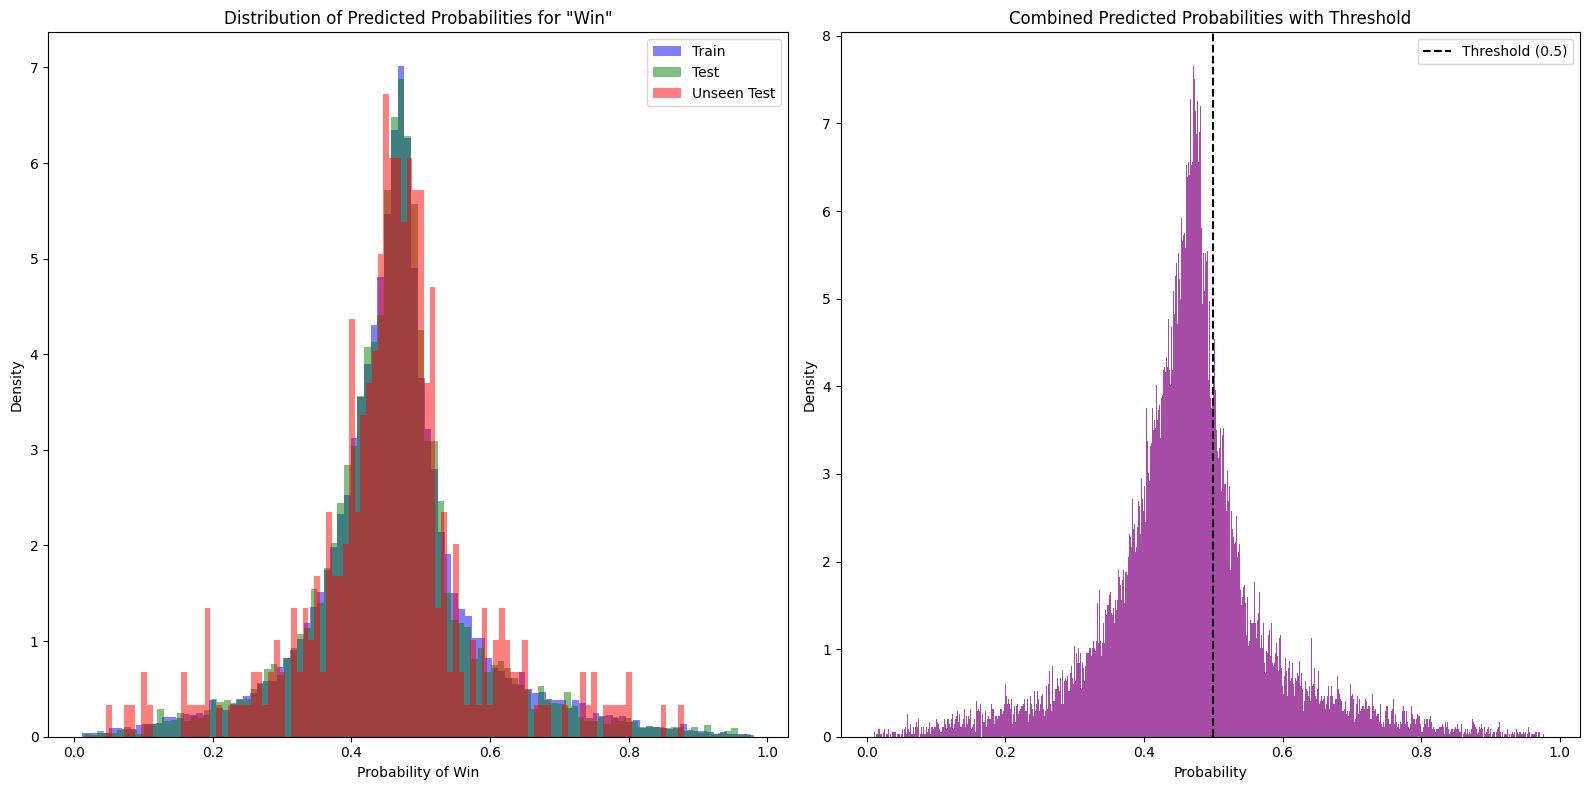

In [73]:
# Define a more comprehensive set of hyperparameters
log_reg_params = {
    'C': [0.01, 0.1, 1, 10, 100],  # Extending the range of C
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Including all common solvers
    'penalty': ['l2', 'none']  # Additional regularization options, applicable to solvers
}

# Initialize GridSearchCV with the extended parameters
grid_log_reg = GridSearchCV(
    LogisticRegression(max_iter=10000, random_state=42),
    log_reg_params,
    cv=5,  # Using 5-fold cross-validation
    scoring='precision',  # Can change to 'f1' or another metric depending on the focus here for wining probility it is better to be Precision
    verbose=1,
    n_jobs=-1
)

# Fit the grid search to the training data
grid_log_reg.fit(X_train, y_train)

# Retrieve the best model
best_logreg = grid_log_reg.best_estimator_

# Predictions
y_pred_train = best_logreg.predict(X_train)
y_pred_test = best_logreg.predict(X_test)
y_pred_unseen = best_logreg.predict(X_test_unseen)

# Predict probabilities for detailed insights
probabilities_train = best_logreg.predict_proba(X_train)[:, 1]
probabilities_test = best_logreg.predict_proba(X_test)[:, 1]
probabilities_unseen = best_logreg.predict_proba(X_test_unseen)[:, 1]
probabilities = best_logreg.predict_proba(X)[:, 1]

# Metrics calculation
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, average='binary')
recall_train = recall_score(y_train, y_pred_train, average='binary')
f1_train = f1_score(y_train, y_pred_train, average='binary')
conf_matrix_train = confusion_matrix(y_train, y_pred_train)

accuracy_seen = accuracy_score(y_test, y_pred_test)
precision_seen = precision_score(y_test, y_pred_test, average='binary')
recall_seen = recall_score(y_test, y_pred_test, average='binary')
f1_seen = f1_score(y_test, y_pred_test, average='binary')
conf_matrix_seen = confusion_matrix(y_test, y_pred_test)

accuracy_unseen = accuracy_score(y_test_unseen, y_pred_unseen)
precision_unseen = precision_score(y_test_unseen, y_pred_unseen, average='binary')
recall_unseen = recall_score(y_test_unseen, y_pred_unseen, average='binary')
f1_unseen = f1_score(y_test_unseen, y_pred_unseen, average='binary')
conf_matrix_unseen = confusion_matrix(y_test_unseen, y_pred_unseen)

# Print best parameters and metrics
print("Best Parameters:", grid_log_reg.best_params_)
print("Metrics for Training Data:")
print(f"Accuracy: {accuracy_train:.4f}, Precision: {precision_train:.4f}, Recall: {recall_train:.4f}, F1 Score: {f1_train:.4f}")
print("Confusion Matrix:")
print(conf_matrix_train)

print("\nMetrics for Seen Test Data:")
print(f"Accuracy: {accuracy_seen:.4f}, Precision: {precision_seen:.4f}, Recall: {recall_seen:.4f}, F1 Score: {f1_seen:.4f}")
print("Confusion Matrix:")
print(conf_matrix_seen)

print("\nMetrics for Unseen Test Data:")
print(f"Accuracy: {accuracy_unseen:.4f}, Precision: {precision_unseen:.4f}, Recall: {recall_unseen:.4f}, F1 Score: {f1_unseen:.4f}")
print("Confusion Matrix:")
print(conf_matrix_unseen)

# Combined distribution for Train, Test, and Unseen Test
plt.figure(figsize=(16, 8))

# Subplot 1: Distribution of Train, Test, and Unseen Test probabilities
plt.subplot(1, 2, 1)
plt.hist(probabilities_train, bins=100, color='blue', alpha=0.5, label='Train', density=True)
plt.hist(probabilities_test, bins=100, color='green', alpha=0.5, label='Test', density=True)
plt.hist(probabilities_unseen, bins=100, color='red', alpha=0.5, label='Unseen Test', density=True)
plt.title('Distribution of Predicted Probabilities for "Win"')
plt.xlabel('Probability of Win')
plt.ylabel('Density')
plt.legend()

# Subplot 2: Combined predicted probabilities with threshold

plt.subplot(1, 2, 2)
plt.hist(probabilities, bins=1000, color='purple', alpha=0.7, density=True)
plt.title('Combined Predicted Probabilities with Threshold')
plt.xlabel('Probability')
plt.ylabel('Density')
plt.axvline(x=0.5, color='black', linestyle='--', label='Threshold (0.5)')
plt.legend()

plt.tight_layout()
plt.show()




### Logistic Regression Model Evaluation and Results

---

#### **Overview**
Logistic Regression is a widely used binary classification algorithm. This project evaluated a Logistic Regression model by optimizing hyperparameters, analyzing its performance on training, seen test, and unseen test datasets, and visualizing predicted probabilities for the "Win" class.

---

### **Hyperparameter Tuning**
| **Parameter**  | **Values Tested**                                   |
|----------------|-----------------------------------------------------|
| **`C`**        | [0.01, 0.1, 1, 10, 100]                            |
| **`solver`**   | ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']  |
| **`penalty`**  | ['l2', 'none']                                      |

- **Cross-Validation**: A 5-fold cross-validation approach ensured robust generalization during hyperparameter tuning.
- **Best Parameters**:
  - **`C`**: 0.01
  - **`penalty`**: 'l2'
  - **`solver`**: 'saga'

---

### **Performance Metrics**

| **Dataset**      | **Accuracy** | **Precision** | **Recall** | **F1 Score** |
|-------------------|--------------|---------------|------------|--------------|
| **Training**      | 0.6105       | 0.6287        | 0.3805     | 0.4741       |
| **Seen Test**     | 0.5986       | 0.6189        | 0.3551     | 0.4512       |
| **Unseen Test**   | 0.5714       | 0.6040        | 0.3506     | 0.4436       |

---

### **Probability Distribution Analysis**
The predicted probabilities for the "Win" class (`is_winner=1`) were visualized as histograms:
- **Training Data**: Blue histogram.
- **Seen Test Data**: Green histogram.
- **Unseen Test Data**: Red histogram.

#### Key Observations:
1. **Overlap in Distributions**:
   - Substantial overlap across training, test, and unseen test data indicates the model struggles to clearly separate winners and non-winners.
2. **Generalization**:
   - The similarity between training and test distributions shows the model generalizes moderately well but highlights limited predictive power for unseen scenarios.

---

### **Key Observations**

#### **Model Tuning**:
- Optimal parameters (**`C=0.01`**, **`penalty='l2'`**, **`solver='saga'`**) balanced bias and variance effectively during training.

#### **Performance**:
1. The **F1 Score** decreased from **0.4741** (training) to **0.4512** (seen test), and further to unseen datasets (**0.4436**), suggesting a slight overfitting issue.
2. The **Accuracy**, **Precision**, and **Recall** metrics reflect moderate predictive power but indicate challenges in effectively predicting winners.

#### **Probability Distributions**:
- Overlapping histograms emphasize the need for further improvement in model discrimination between winners and non-winners.

---

### **Next Steps**

1. **Threshold Tuning**:
   - Adjust the classification threshold (0.5) for the "Win" class to improve recall without sacrificing precision.

---


### **Note**:
While next analysis focuses on maximizing the algorithm's theoretical power, in real-world applications, predictions for new data must consider consistent preprocessing, especially scaling. Scaling subsets independently or inconsistently can distort predictions. The next section elaborates on this consideration and how it impacts practical deployments.

***next cell scale varibles sepratly and next cell after this scale whole once. scaling one class make it is easier for a class this approach is to know strength of model***

Percentage of correct predictions for winners (prob > 0.5): 53.31%
Percentage of correct predictions for non-winners (prob < 0.5): 68.30%


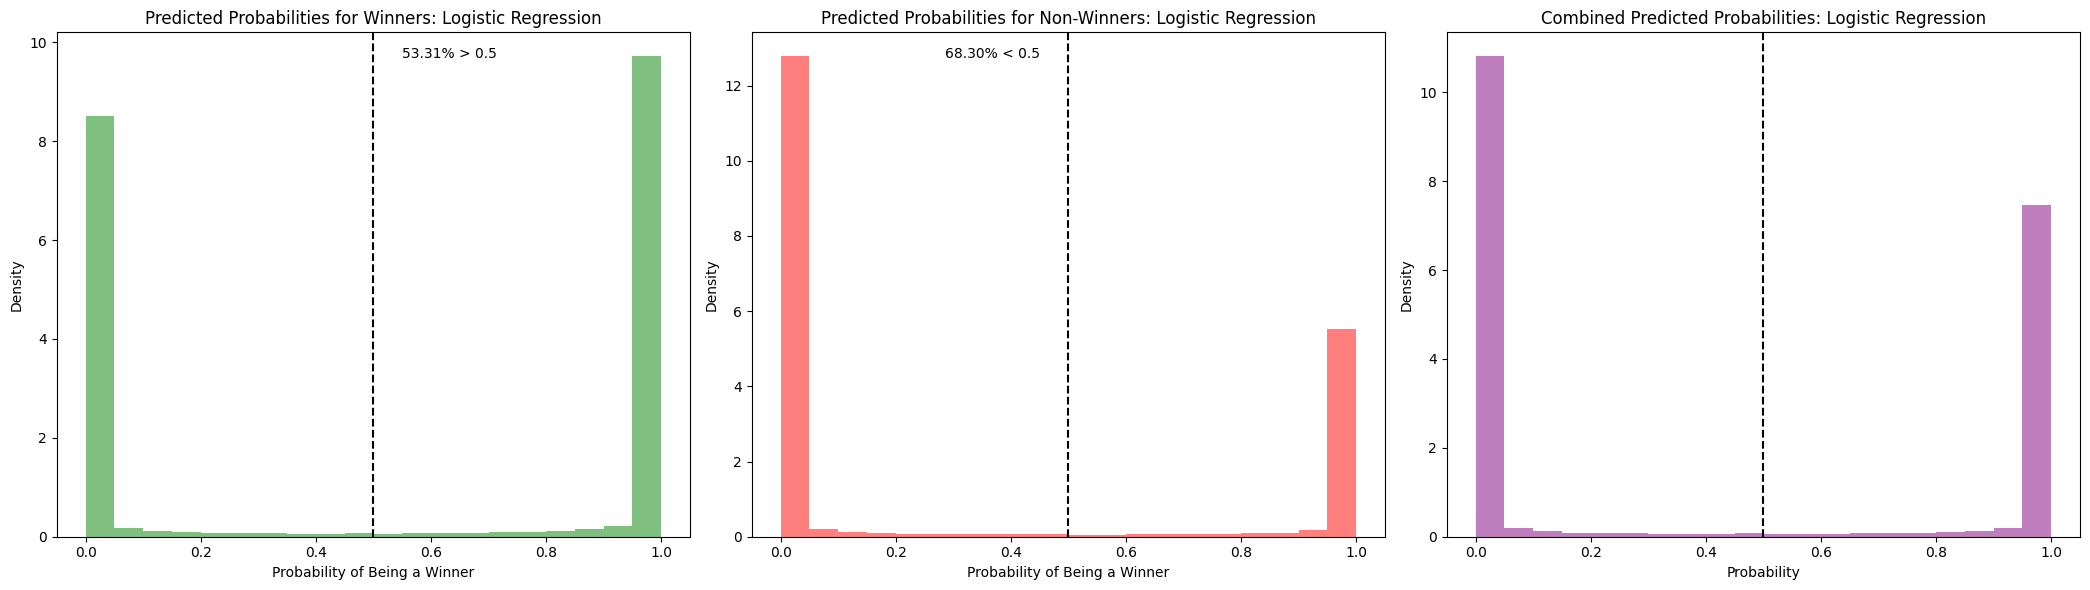

In [89]:
winners=data_win_p[data_win_p['is_winner']==1]
not_winners=data_win_p[data_win_p['is_winner']==0]

X_winners = winners.drop('is_winner', axis=1)
x_not_winners = not_winners.drop('is_winner', axis=1)

scaler.transform(X_winners)
scaler.transform(x_not_winners)

# Predict probabilities for winners
probabilities_winners_logreg = best_logreg.predict_proba(X_winners)[:, 1]
probabilities_non_winners_logreg = best_logreg.predict_proba(x_not_winners)[:, 1]

probabilities_winners_and_not_winners = np.concatenate((probabilities_winners_logreg, probabilities_non_winners_logreg))


# Calculate the percentage of predictions above 0.5 for winners and below 0.5 for non-winners
percentage_correct_winners_logreg = (probabilities_winners_logreg > 0.5).mean() * 100
percentage_correct_non_winners_logreg = (probabilities_non_winners_logreg < 0.5).mean() * 100

# Output the results
print(f"Percentage of correct predictions for winners (prob > 0.5): {percentage_correct_winners_logreg:.2f}%")
print(f"Percentage of correct predictions for non-winners (prob < 0.5): {percentage_correct_non_winners_logreg:.2f}%")

# Plotting the distribution of probabilities
plt.figure(figsize=(21, 6))

plt.subplot(1, 3, 1)
plt.hist(probabilities_winners_logreg, bins=20, color='green', alpha=0.5, density=True)
plt.title('Predicted Probabilities for Winners: Logistic Regression')
plt.xlabel('Probability of Being a Winner')
plt.ylabel('Density')
plt.axvline(x=0.5, color='black', linestyle='--')
plt.annotate(f'{percentage_correct_winners_logreg:.2f}% > 0.5', xy=(0.55, max(plt.gca().get_ylim())*0.95), color='black')

plt.subplot(1, 3, 2)
plt.hist(probabilities_non_winners_logreg, bins=20, color='red', alpha=0.5, density=True)
plt.title('Predicted Probabilities for Non-Winners: Logistic Regression')
plt.xlabel('Probability of Being a Winner')
plt.ylabel('Density')
plt.axvline(x=0.5, color='black', linestyle='--')
plt.annotate(f'{percentage_correct_non_winners_logreg:.2f}% < 0.5', xy=(0.45, max(plt.gca().get_ylim())*0.95), color='black', horizontalalignment='right')

plt.subplot(1,3,3)
plt.hist(probabilities_winners_and_not_winners, bins=20, color='purple', alpha=0.5, density=True)
plt.title('Combined Predicted Probabilities: Logistic Regression')
plt.xlabel('Probability')
plt.ylabel('Density')
plt.axvline(x=0.5, color='black', linestyle='--')

plt.tight_layout()
plt.show()

### Logistic Regression: Predicted Probabilities Analysis

This analysis investigates how well a logistic regression model predicts the probabilities of winners and non-winners, using a threshold of 0.5 to classify each.

---

### **Key Results**

| **Metric**                             | **Percentage (%)** |
|----------------------------------------|---------------------|
| **Correct Predictions for Winners**    | **53.31**           |
| **Correct Predictions for Non-Winners**| **68.30**           |

---

### **Graphical Insights**

1. **Left Plot**: Predicted Probabilities for Winners
   - The histogram illustrates the density of predicted probabilities for true winners (`is_winner=1`).
   - A **vertical dashed line** at the threshold of **0.5** indicates the cutoff for classifying a team as a "winner."
   - **53.31%** of true winners are classified correctly (probability > 0.5), while the remaining fall below the threshold, leading to misclassification.

2. **Right Plot**: Predicted Probabilities for Non-Winners
   - The histogram shows the density of predicted probabilities for true non-winners (`is_winner=0`).
   - A **vertical dashed line** at the threshold of **0.5** serves as the cutoff for classifying a team as a "non-winner."
   - **68.30%** of true non-winners are correctly classified (probability < 0.5), indicating better performance for this class.

---

### **Observations**

#### **Model Strength**:
- The model is more effective at identifying **non-winners**, with a higher percentage of correct predictions (**68.30%**) compared to winners (**53.31%**).

#### **Model Weakness**:
- The model struggles to accurately classify winners, as a significant proportion of true winners receive probabilities below the threshold of 0.5.

---

### **Assumptions and Context**

#### Why Winner Prediction is Challenging:
- **Non-winners are easier to identify**:
  - Teams with poor performance indicators are more likely to be classified as non-winners.
- **Winners are harder to predict**:
  - Factors such as unexpected performance, coaching decisions, and external influences make predicting winners inherently more complex.

#### Model Context:
- The **53.31% accuracy for winners** may appear low but reflects the realistic difficulty of classifying winners in uncertain conditions.
- The model’s ability to separate winners and non-winners is limited, as evident from the overlapping distributions in the histograms.

---

### **Implications**

#### 1. **Threshold Adjustment**:
- Modifying the classification threshold lower from **0.5** may help improve the recall for winners, trading off some precision.


---

.


Percentage of correct predictions for winners (prob > 0.45): 67.78%
Percentage of correct predictions for non-winners (prob < 0.45): 52.10%
Percentage of correct predictions for winners standard (prob > 0.5): 37.51%
Percentage of correct predictions for non-winners standard (prob < 0.5): 80.78%


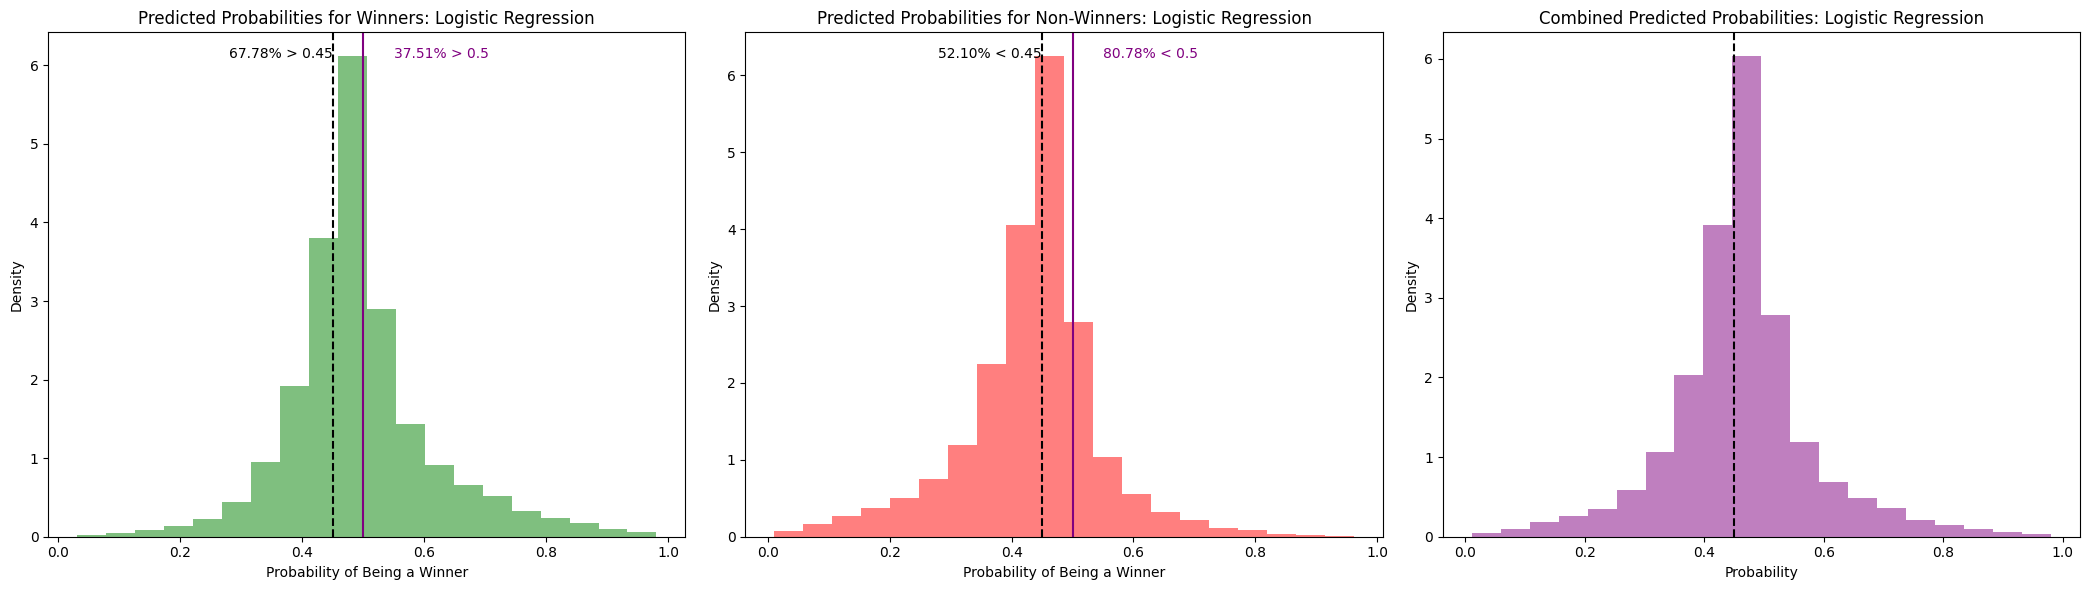

In [100]:
final_data = pd.concat([X, y], axis=1)

winners=final_data[final_data['is_winner']==1]
not_winners=final_data[final_data['is_winner']==0]

X_winners = winners.drop('is_winner', axis=1)
x_not_winners = not_winners.drop('is_winner', axis=1)

# Predict probabilities for winners
probabilities_winners_logreg = best_logreg.predict_proba(X_winners)[:, 1]
probabilities_non_winners_logreg = best_logreg.predict_proba(x_not_winners)[:, 1]

probabilities_winners_and_not_winners = np.concatenate((probabilities_winners_logreg, probabilities_non_winners_logreg))


# Calculate the percentage of predictions above 0.45 for winners and below 0.35 for non-winners
percentage_correct_winners_logreg = (probabilities_winners_logreg > 0.45).mean() * 100
percentage_correct_non_winners_logreg = (probabilities_non_winners_logreg < 0.45).mean() * 100

percentage_correct_winners_logreg_standard = (probabilities_winners_logreg > 0.5).mean() * 100
percentage_correct_non_winners_logreg_standard = (probabilities_non_winners_logreg < 0.5).mean() * 100

# Output the results
print(f"Percentage of correct predictions for winners (prob > 0.45): {percentage_correct_winners_logreg:.2f}%")
print(f"Percentage of correct predictions for non-winners (prob < 0.45): {percentage_correct_non_winners_logreg:.2f}%")
print(f"Percentage of correct predictions for winners standard (prob > 0.5): {percentage_correct_winners_logreg_standard:.2f}%")
print(f"Percentage of correct predictions for non-winners standard (prob < 0.5): {percentage_correct_non_winners_logreg_standard:.2f}%")

# Plotting the distribution of probabilities
plt.figure(figsize=(21, 6))

plt.subplot(1, 3, 1)
plt.hist(probabilities_winners_logreg, bins=20, color='green', alpha=0.5, density=True)
plt.title('Predicted Probabilities for Winners: Logistic Regression')
plt.xlabel('Probability of Being a Winner')
plt.ylabel('Density')
plt.axvline(x=0.45, color='black', linestyle='--')
plt.annotate(f'{percentage_correct_winners_logreg:.2f}% > 0.45', xy=(0.45, max(plt.gca().get_ylim())*0.95), color='black',horizontalalignment='right')

plt.axvline(x=0.5, color='purple', linestyle='-')
plt.annotate(f'{percentage_correct_winners_logreg_standard:.2f}% > 0.5', xy=(0.55, max(plt.gca().get_ylim())*0.95), color='purple', horizontalalignment='left')



plt.subplot(1, 3, 2)
plt.hist(probabilities_non_winners_logreg, bins=20, color='red', alpha=0.5, density=True)
plt.title('Predicted Probabilities for Non-Winners: Logistic Regression')
plt.xlabel('Probability of Being a Winner')
plt.ylabel('Density')
plt.axvline(x=0.45, color='black', linestyle='--')
plt.annotate(f'{percentage_correct_non_winners_logreg:.2f}% < 0.45', xy=(0.45, max(plt.gca().get_ylim())*0.95), color='black', horizontalalignment='right')

plt.axvline(x=0.5, color='purple', linestyle='-')
plt.annotate(f'{percentage_correct_non_winners_logreg_standard:.2f}% < 0.5', xy=(0.55, max(plt.gca().get_ylim())*0.95), color='purple', horizontalalignment='left')



plt.subplot(1,3,3)
plt.hist(probabilities_winners_and_not_winners, bins=20, color='purple', alpha=0.5, density=True)
plt.title('Combined Predicted Probabilities: Logistic Regression')
plt.xlabel('Probability')
plt.ylabel('Density')
plt.axvline(x=0.45, color='black', linestyle='--')

plt.tight_layout()
plt.show()



### Logistic Regression: Threshold Tuning Results

---

#### **Performance Comparison**

| **Threshold** | **Metric**                      | **Winners (%)** | **Non-Winners (%)** |
|---------------|----------------------------------|------------------|----------------------|
| **Standard (0.5)** | Correct Predictions          | 37.51           | 80.78               |
| **Adjusted (0.45)** | Correct Predictions          | 67.78           | 52.10               |
| **Standard (0.5)** | Misclassification Rate       | 62.49           | 19.22               |
| **Adjusted (0.45)** | Misclassification Rate       | 32.22           | 47.90               |

---

#### **Key Observations**

1. **Standard Threshold (0.5)**:
   - Provides better results for non-winners with an **80.78% correct prediction rate**.
   - Struggles with winners, achieving only **37.51% correct predictions**.

2. **Adjusted Threshold (0.45)**:
   - Improves predictions for winners significantly (**+30.27% increase**).
   - Reduces accuracy for non-winners (**-28.68% decrease**).

---

#### **Insights and Recommendations**

- **Threshold Selection**:
  - Standard threshold (0.5) reflects balanced scenarios, better suited for **non-winner prioritization**.
  - Adjusted threshold (0.45) works well for **winner-sensitive applications**, improving their identification.

- **Trade-Off**:
  - Lowering the threshold favors recall for winners but sacrifices precision for non-winners.

---
